# Общий отчёт для лаб2, 3 и ДЗ1

In [360]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

# Лаб 2

In [7]:
import warnings; warnings.simplefilter('ignore')

In [8]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

In [9]:
def get_nullable_columns(df):
    return [(c, df[c].isnull().mean()) for c in df.columns if df[c].isnull().sum() > 0]

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
data = pd.read_csv('arabica_data_cleaned.csv', index_col=0)

In [12]:
data.head()

Species                     Owner Country.of.Origin  \
1  Arabica                 metad plc          Ethiopia   
2  Arabica                 metad plc          Ethiopia   
3  Arabica  grounds for health admin         Guatemala   
4  Arabica       yidnekachew dabessa          Ethiopia   
5  Arabica                 metad plc          Ethiopia   

                                  Farm.Name Lot.Number       Mill ICO.Number  \
1                                 metad plc        NaN  metad plc  2014/2015   
2                                 metad plc        NaN  metad plc  2014/2015   
3  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
4     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
5                                 metad plc        NaN  metad plc  2014/2015   

                                 Company       Altitude        Region  \
1      metad agricultural developmet plc      1950-2200  guji-hambela   
2      metad agricultural developmet plc      1950-2200  guji-hambela   
3                                    NaN  1600 - 1800 m           NaN   
4  yidnekachew debessa coffee plantation      1800-2200        oromia   
5      metad agricultural developmet plc      1950-2200  guji-hambela   

                                Producer  Number.of.Bags Bag.Weight  \
1                              METAD PLC             300      60 kg   
2                              METAD PLC             300      60 kg   
3                                    NaN               5          1   
4  Yidnekachew Dabessa Coffee Plantation             320      60 kg   
5                              METAD PLC             300      60 kg   

                   In.Country.Partner Harvest.Year      Grading.Date  \
1  METAD Agricultural Development plc         2014   April 4th, 2015   
2  METAD Agricultural Development plc         2014   April 4th, 2015   
3        Specialty Coffee Association          NaN    May 31st, 2010   
4  METAD Agricultural Development plc         2014  March 26th, 2015   
5  METAD Agricultural Development plc         2014   April 4th, 2015   

                    Owner.1  Variety Processing.Method  Aroma  Flavor  \
1                 metad plc      NaN      Washed / Wet   8.67    8.83   
2                 metad plc    Other      Washed / Wet   8.75    8.67   
3  Grounds for Health Admin  Bourbon               NaN   8.42    8.50   
4       Yidnekachew Dabessa      NaN     Natural / Dry   8.17    8.58   
5                 metad plc    Other      Washed / Wet   8.25    8.50   

   Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
1        8.67     8.75  8.50     8.42        10.0       10.0       10.0   
2        8.50     8.58  8.42     8.42        10.0       10.0       10.0   
3        8.42     8.42  8.33     8.42        10.0       10.0       10.0   
4        8.42     8.42  8.50     8.25        10.0       10.0       10.0   
5        8.25     8.50  8.42     8.33        10.0       10.0       10.0   

   Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  Quakers  \
1           8.75             90.58      0.12                     0      0.0   
2           8.58             89.92      0.12                     0      0.0   
3           9.25             89.75      0.00                     0      0.0   
4           8.67             89.00      0.11                     0      0.0   
5           8.58             88.83      0.12                     0      0.0   

   Color  Category.Two.Defects        Expiration  \
1  Green                     0   April 3rd, 2016   
2  Green                     1   April 3rd, 2016   
3    NaN                     0    May 31st, 2011   
4  Green                     2  March 25th, 2016   
5  Green                     2   April 3rd, 2016   

                   Certification.Body  \
1  METAD Agricultural Development plc   
2  METAD Agricultural Development plc   
3        Specialty Coffee Association   
4  METAD Agricultural Developmen

In [13]:
data.shape

(1311, 43)

In [14]:
data.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

In [15]:
nullable_columns = get_nullable_columns(data)

In [16]:
nullable_columns

[('Owner', 0.005339435545385202),
 ('Country.of.Origin', 0.0007627765064836003),
 ('Farm.Name', 0.2715484363081617),
 ('Lot.Number', 0.7940503432494279),
 ('Mill', 0.23646071700991608),
 ('ICO.Number', 0.11136536994660565),
 ('Company', 0.15942028985507245),
 ('Altitude', 0.17009916094584288),
 ('Region', 0.043478260869565216),
 ('Producer', 0.17543859649122806),
 ('Harvest.Year', 0.03585049580472922),
 ('Owner.1', 0.005339435545385202),
 ('Variety', 0.15331807780320367),
 ('Processing.Method', 0.11594202898550725),
 ('Quakers', 0.0007627765064836003),
 ('Color', 0.16475972540045766),
 ('altitude_low_meters', 0.17315026697177727),
 ('altitude_high_meters', 0.17315026697177727),
 ('altitude_mean_meters', 0.17315026697177727)]

Удалим колонки, в которых больше половины пропусков

In [17]:
bad_cols = [c for c, percent in nullable_columns if percent > 0.2]
bad_cols

['Farm.Name', 'Lot.Number', 'Mill']

In [18]:
data_1 = data.drop(columns=bad_cols)

In [19]:
data_1.shape

(1311, 40)

Удалим строки, пустые значения к которым относятся к строкам, в которых мало пропусков

In [20]:
just_good_cols = [c for c, percent in nullable_columns if percent <= 0.05]
just_good_cols

['Owner', 'Country.of.Origin', 'Region', 'Harvest.Year', 'Owner.1', 'Quakers']

In [21]:
data_2 = data_1.dropna(axis=0, subset=just_good_cols)

In [22]:
data_2.shape

(1217, 40)

In [23]:
nullable_columns_2 = get_nullable_columns(data_2)
nullable_columns_2

[('ICO.Number', 0.09531635168447),
 ('Company', 0.13475760065735415),
 ('Altitude', 0.12489728841413311),
 ('Producer', 0.13968775677896467),
 ('Variety', 0.11257189811010682),
 ('Processing.Method', 0.0838126540673788),
 ('Color', 0.13968775677896467),
 ('altitude_low_meters', 0.12818405916187345),
 ('altitude_high_meters', 0.12818405916187345),
 ('altitude_mean_meters', 0.12818405916187345)]

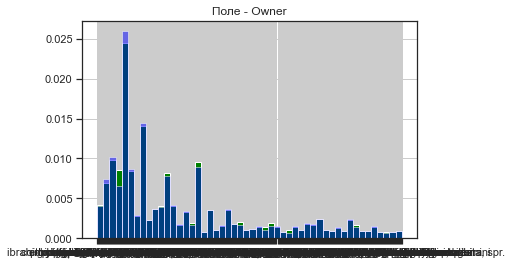

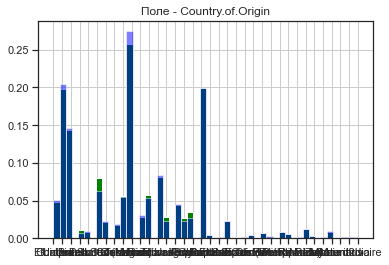

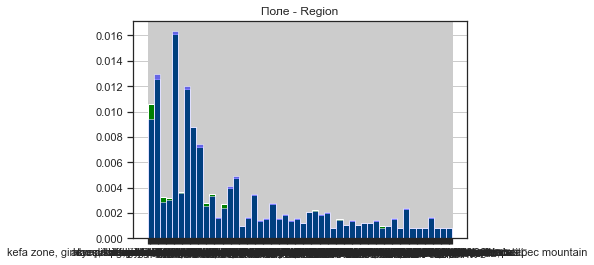

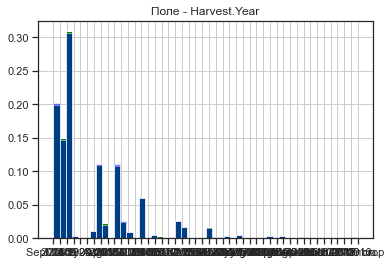

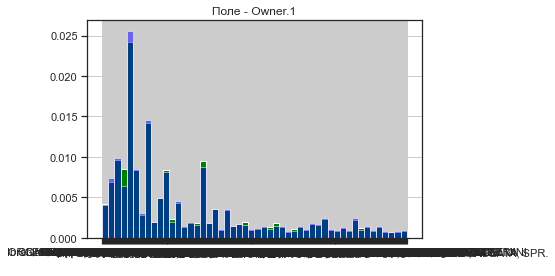

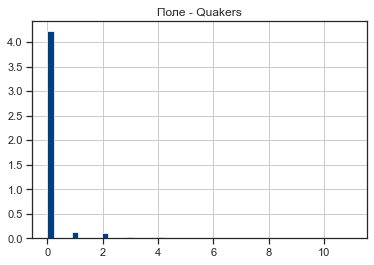

In [24]:
plot_hist_diff(data_1, data_2, just_good_cols)

In [25]:
numeric_columns = data_2.select_dtypes(include=np.number).columns
numeric_columns

Index(['Number.of.Bags', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Category.Two.Defects', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')

In [26]:
categorical_columns = data_2.select_dtypes(include=np.object).columns
categorical_columns

Index(['Species', 'Owner', 'Country.of.Origin', 'ICO.Number', 'Company',
       'Altitude', 'Region', 'Producer', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Color', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact',
       'unit_of_measurement'],
      dtype='object')

In [27]:
data_3 = data_2.copy()

for col in numeric_columns:
    data_3[col] = data_3[col].fillna(data_3[col].mean())

In [28]:
nullable_columns_3 = get_nullable_columns(data_3)
nullable_columns_3

[('ICO.Number', 0.09531635168447),
 ('Company', 0.13475760065735415),
 ('Altitude', 0.12489728841413311),
 ('Producer', 0.13968775677896467),
 ('Variety', 0.11257189811010682),
 ('Processing.Method', 0.0838126540673788),
 ('Color', 0.13968775677896467)]

In [29]:
data_3.shape

(1217, 40)

In [30]:
trash_cols = ['ICO.Number', 'Altitude', 'Company']
data_4 = data_3.drop(columns=trash_cols)

fill_mean_cols = get_nullable_columns(data_4)
for col, _ in fill_mean_cols:
    data_4[col].fillna(data_4[col].mode()[0], inplace=True)
    print(data_4[col].mode(), data[col].isnull().sum())    

0    La Plata
dtype: object 230
0    Caturra
dtype: object 201
0    Washed / Wet
dtype: object 152
0    Green
dtype: object 216


In [31]:
nullable_columns_4 = get_nullable_columns(data_4)
nullable_columns_4

[]

In [32]:
data_4.shape

(1217, 37)

Нормализация числового признака

In [33]:
def diagnostic_plots(col):
    plt.figure(figsize=(15,5))
    
    # гистограмма
    plt.subplot(1, 2, 1)
    col.hist(bins=30)
    

    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(col, dist="norm", plot=plt)
    plt.show()

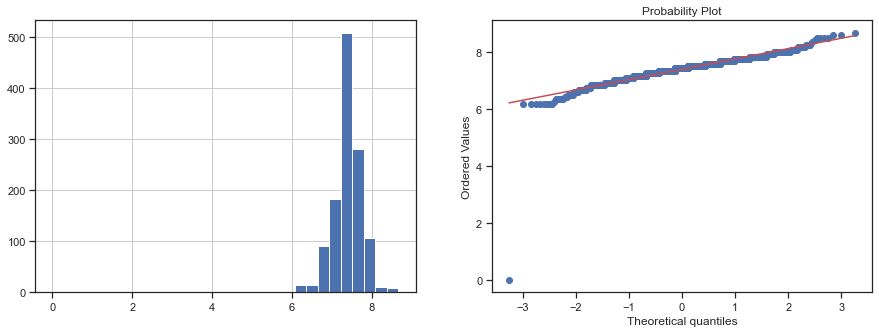

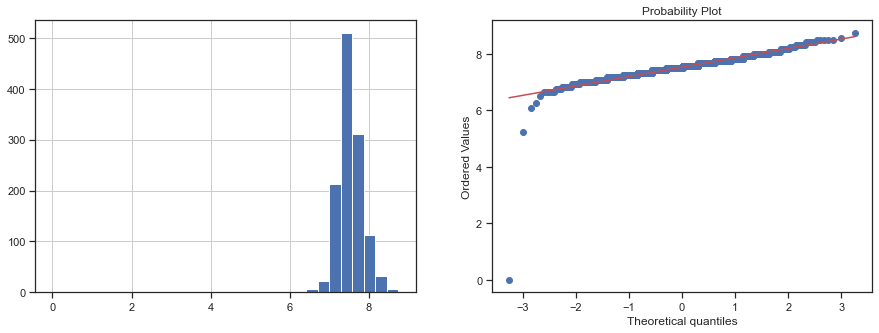

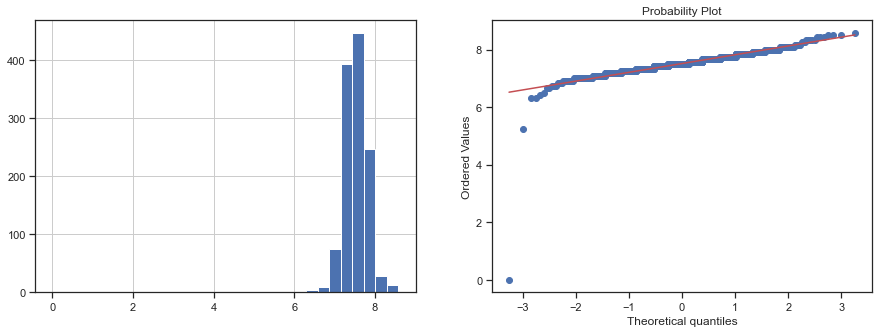

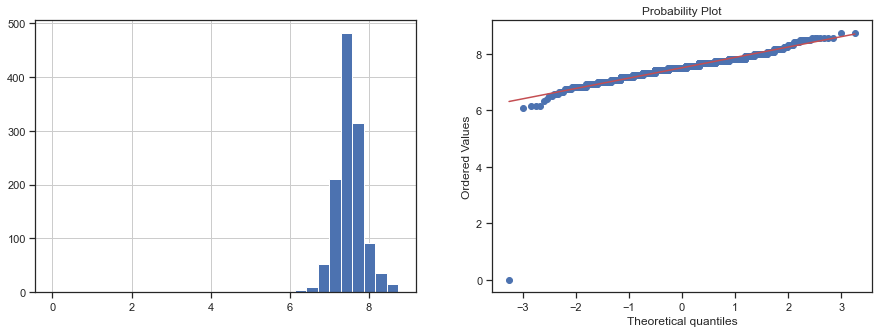

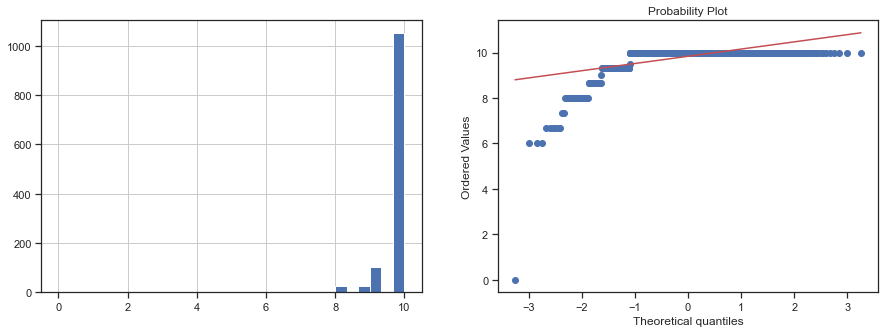

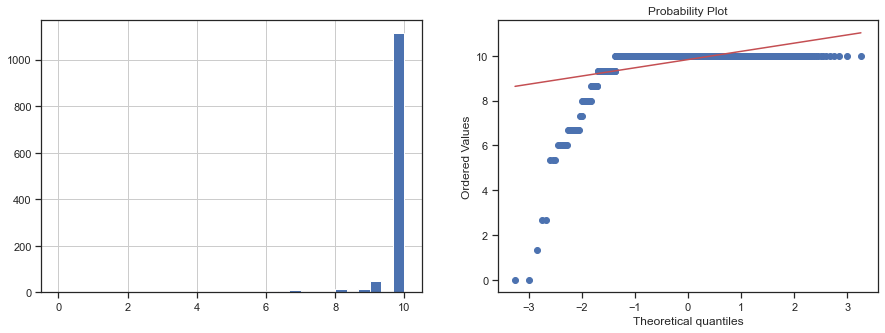

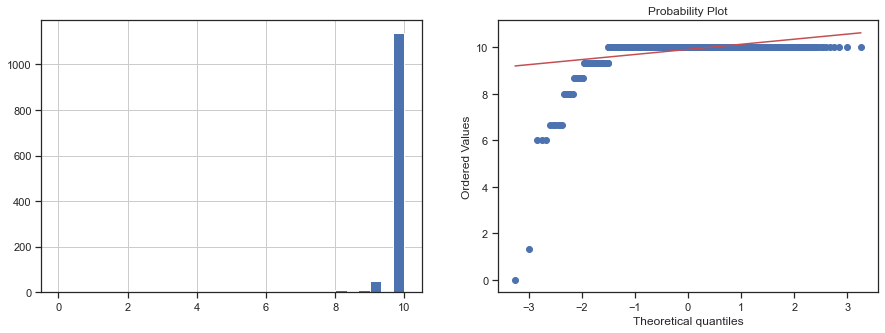

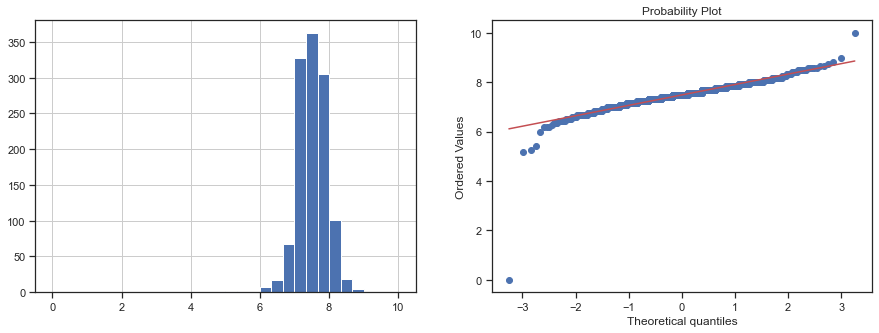

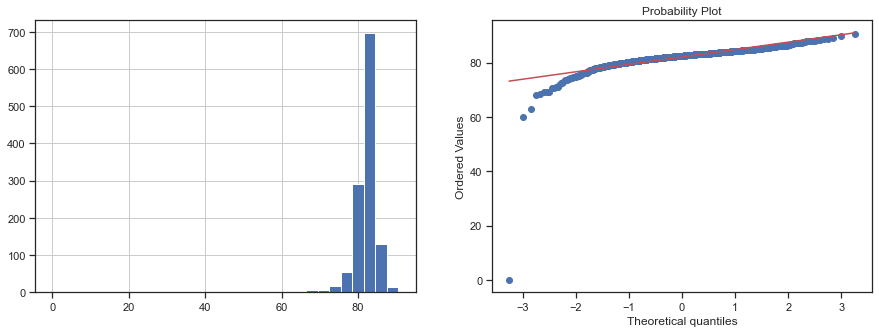

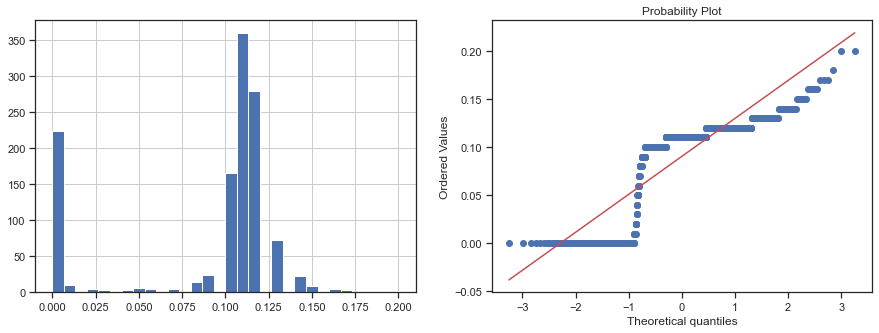

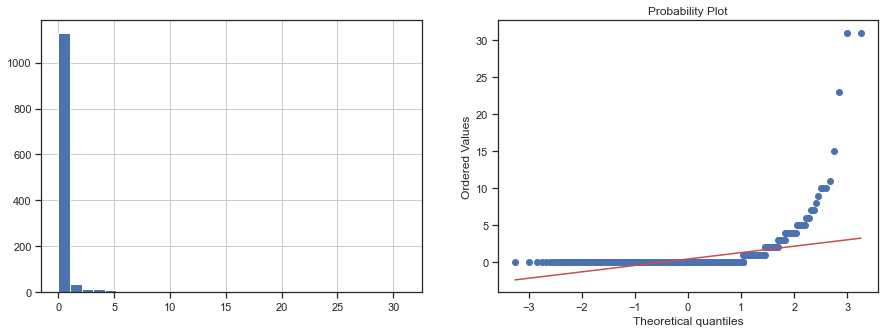

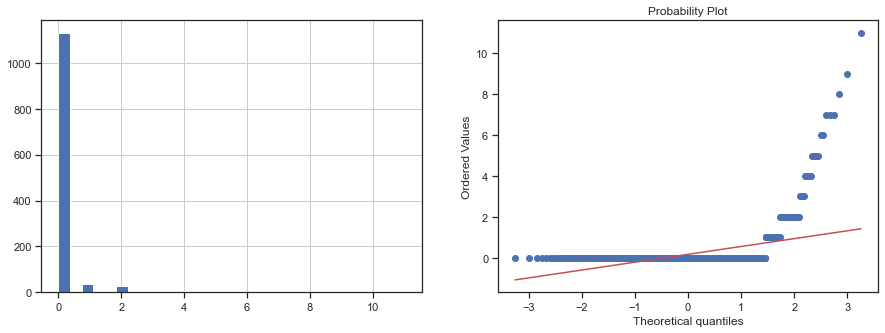

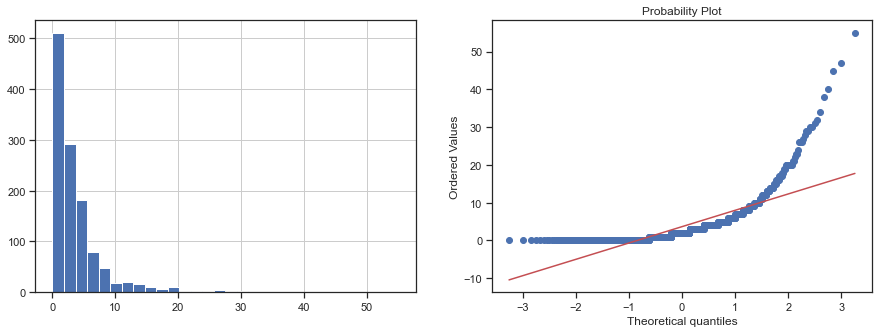

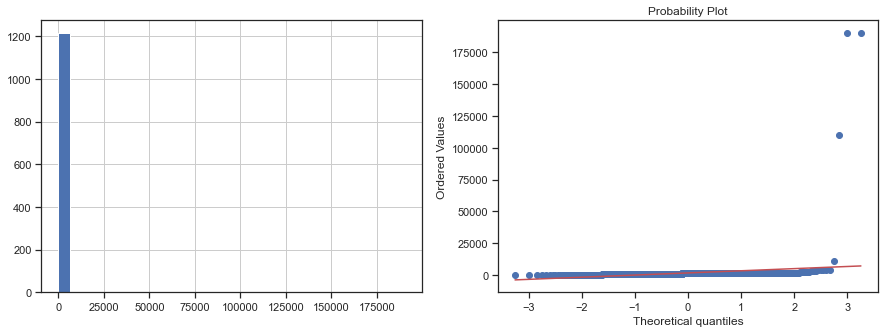

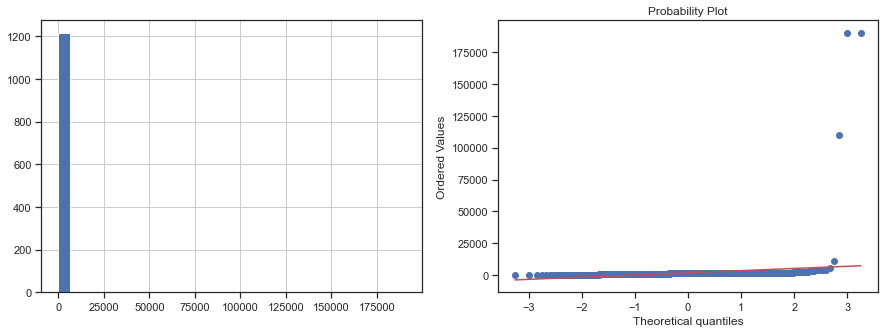

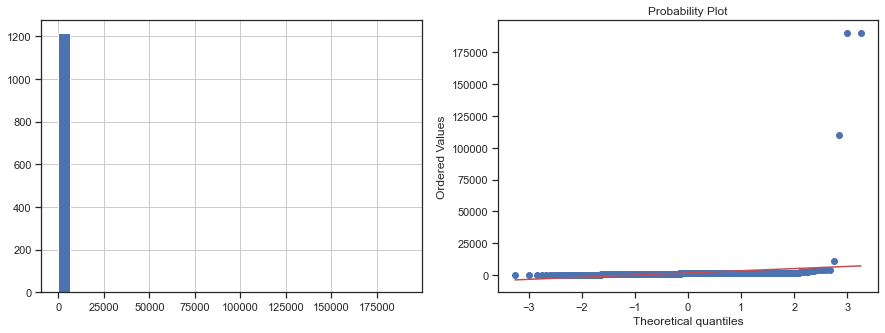

In [34]:
for num_col in numeric_columns:
    diagnostic_plots(data_4[num_col])

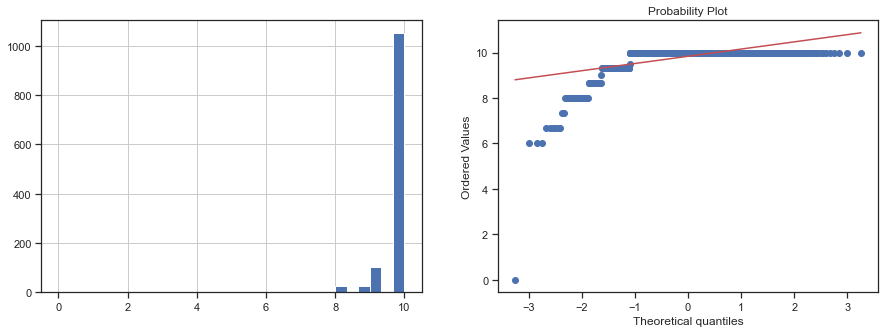

In [35]:
col_norm = 'Uniformity'
diagnostic_plots(data_4[col_norm])

In [36]:
data_4[col_norm] = np.log(data_4[col_norm]).replace([np.inf, -np.inf], np.nan)
data_4.dropna(axis=0, subset=[col_norm])

Species                        Owner Country.of.Origin  \
1     Arabica                    metad plc          Ethiopia   
2     Arabica                    metad plc          Ethiopia   
4     Arabica          yidnekachew dabessa          Ethiopia   
5     Arabica                    metad plc          Ethiopia   
8     Arabica  ethiopia commodity exchange          Ethiopia   
...       ...                          ...               ...   
1306  Arabica                      cadexsa          Honduras   
1307  Arabica     juan carlos garcia lopez            Mexico   
1308  Arabica      myriam kaplan-pasternak             Haiti   
1309  Arabica   exportadora atlantic, s.a.         Nicaragua   
1310  Arabica    juan luis alvarado romero         Guatemala   

                               Region  \
1                        guji-hambela   
2                        guji-hambela   
4                              oromia   
5                        guji-hambela   
8                              oromia   
...                               ...   
1306                          marcala   
1307               juchique de ferrer   
1308  department d'artibonite , haiti   
1309                           jalapa   
1310                    nuevo oriente   

                                       Producer  Number.of.Bags Bag.Weight  \
1                                     METAD PLC             300      60 kg   
2                                     METAD PLC             300      60 kg   
4         Yidnekachew Dabessa Coffee Plantation             320      60 kg   
5                                     METAD PLC             300      60 kg   
8     Bazen Agricultural & Industrial Dev't Plc             300      60 kg   
...                                         ...             ...        ...   
1306                                Omar Acosta             275       1 kg   
1307                   JUAN CARLOS GARCÍA LOPEZ              12       1 kg   
1308              COEB Koperativ Ekselsyo Basen               1       2 kg   
1309                            Teófilo Narváez             550      69 kg   
1310          WILLIAM ESTUARDO MARTINEZ PACHECO             275       1 kg   

                      In.Country.Partner Harvest.Year          Grading.Date  \
1     METAD Agricultural Development plc         2014       April 4th, 2015   
2     METAD Agricultural Development plc         2014       April 4th, 2015   
4     METAD Agricultural Development plc         2014      March 26th, 2015   
5     METAD Agricultural Development plc         2014       April 4th, 2015   
8            Ethiopia Commodity Exchange   March 2010   September 2nd, 2010   
...                                  ...          ...                   ...   
1306        Instituto Hondureño del Café         2014        May 15th, 2014   
1307                             AMECAFE         2012  September 17th, 2012   
1308        Specialty Coffee Association         2012        May 24th, 2012   
1309        Instituto Hondureño del Café         2016        June 6th, 2017   
1310        Asociacion Nacional Del Café         2012        May 24th, 2012   

                          Owner.1  Variety Processing.Method  Aroma  Flavor  \
1                       metad plc  Caturra      Washed / Wet   8.67    8.83   
2                       metad plc    Other      Washed / Wet   8.75    8.67   
4             Yidnekachew Dabessa  Caturra     Natural / Dry   8.17    8.58   
5                       metad plc    Other      Washed / Wet   8.25    8.50   
8     Ethiopia Commodity Exchange  Caturra      Washed / Wet   8.25    8.33   
...                           ...      ...               ...    ...     ...   
1306                      CADEXSA   Catuai      Washed / Wet   7.00    6.33   
1307     JUAN CARLOS GARCIA LOPEZ  Bourbon      Washed / Wet   7.08    6.83   
1308      Myriam Kaplan-Pasternak   Typica     Natural / Dry   6.75    6.58   
1309   Exportadora Atlantic, S.A.  Caturra             Other   7.25 

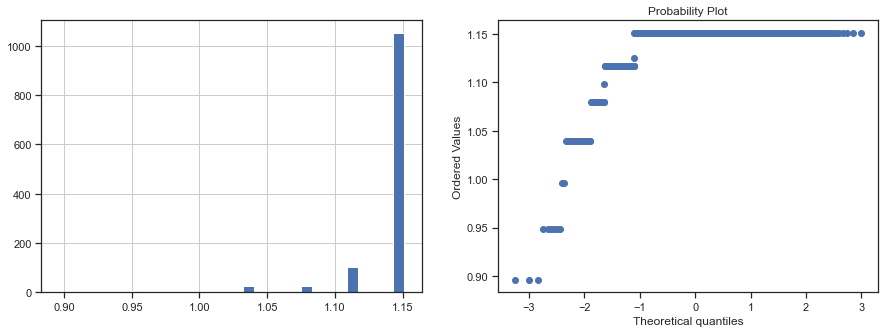

In [37]:
res = data_4[col_norm] ** 1/2
diagnostic_plots(res)

# Лаб 3

**Обработка нестандартных признаков**

In [318]:
df = data_4.copy()

df.describe()

Number.of.Bags        Aroma       Flavor   Aftertaste      Acidity  \
count     1217.000000  1217.000000  1217.000000  1217.000000  1217.000000   
mean       156.890715     7.562021     7.514766     7.391495     7.531701   
std        127.241664     0.382488     0.404798     0.407960     0.384577   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%         15.000000     7.420000     7.330000     7.170000     7.330000   
50%        200.000000     7.580000     7.500000     7.420000     7.500000   
75%        275.000000     7.750000     7.750000     7.580000     7.750000   
max        600.000000     8.750000     8.830000     8.670000     8.750000   

              Body      Balance   Uniformity    Clean.Cup    Sweetness  \
count  1217.000000  1217.000000  1216.000000  1217.000000  1217.000000   
mean      7.512588     7.512514     2.285348     9.833385     9.905136   
std       0.362558     0.412211     0.056341     0.785913     0.538869   
min       0.000000     0.000000     1.791759     0.000000     0.000000   
25%       7.330000     7.330000     2.302585    10.000000    10.000000   
50%       7.500000     7.500000     2.302585    10.000000    10.000000   
75%       7.670000     7.750000     2.302585    10.000000    10.000000   
max       8.580000     8.750000     2.302585    10.000000    10.000000   

       Cupper.Points  Total.Cup.Points     Moisture  Category.One.Defects  \
count    1217.000000       1217.000000  1217.000000           1217.000000   
mean        7.485974         82.085078     0.090345              0.418242   
std         0.464136          3.586049     0.046489              1.841167   
min         0.000000          0.000000     0.000000              0.000000   
25%         7.250000         81.080000     0.100000              0.000000   
50%         7.500000         82.500000     0.110000              0.000000   
75%         7.750000         83.670000     0.120000              0.000000   
max        10.000000         90.580000     0.200000             31.000000   

           Quakers  Category.Two.Defects  altitude_low_meters  \
count  1217.000000           1217.000000          1217.000000   
mean      0.173377              3.658176          1770.600553   
std       0.824390              5.434554          8273.964344   
min       0.000000              0.000000             1.000000   
25%       0.000000              0.000000          1170.000000   
50%       0.000000              2.000000          1400.000000   
75%       0.000000              4.000000          1700.000000   
max      11.000000             55.000000        190164.000000   

       altitude_high_meters  altitude_mean_meters  
count           1217.000000           1217.000000  
mean            1819.173537           1794.887045  
std             8273.326965           8273.185112  
min                1.000000              1.000000  
25%             1200.000000           1200.000000  
50%             1400.000000           1400.000000  
75%             1800.000000           1750.000000  
max           190164.000000         190164.000000

In [319]:
df.isna().sum()

Species                  0
Owner                    0
Country.of.Origin        0
Region                   0
Producer                 0
Number.of.Bags           0
Bag.Weight               0
In.Country.Partner       0
Harvest.Year             0
Grading.Date             0
Owner.1                  0
Variety                  0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               1
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Color                    0
Category.Two.Defects     0
Expiration               0
Certification.Body       0
Certification.Address    0
Certification.Contact    0
unit_of_measurement      0
altitude_low_meters      0
altitude_high_meters     0
altitude_mean_meters     0
d

In [320]:
df = df.dropna(axis=0, subset=['Uniformity'])
df.isna().sum()

Species                  0
Owner                    0
Country.of.Origin        0
Region                   0
Producer                 0
Number.of.Bags           0
Bag.Weight               0
In.Country.Partner       0
Harvest.Year             0
Grading.Date             0
Owner.1                  0
Variety                  0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Color                    0
Category.Two.Defects     0
Expiration               0
Certification.Body       0
Certification.Address    0
Certification.Contact    0
unit_of_measurement      0
altitude_low_meters      0
altitude_high_meters     0
altitude_mean_meters     0
d

In [321]:
import re

def convert (x):
    if 'lbs' in x:
        res, = re.findall(r'\d+', x)
        return str(float(res) * 0.453592)

    return float(x)
    

df["Bag.Weight"] = df["Bag.Weight"].str.replace(' kg', '')
df["Bag.Weight"] = df["Bag.Weight"].apply(convert)

In [322]:
df.head()

Species                        Owner Country.of.Origin        Region  \
1  Arabica                    metad plc          Ethiopia  guji-hambela   
2  Arabica                    metad plc          Ethiopia  guji-hambela   
4  Arabica          yidnekachew dabessa          Ethiopia        oromia   
5  Arabica                    metad plc          Ethiopia  guji-hambela   
8  Arabica  ethiopia commodity exchange          Ethiopia        oromia   

                                    Producer  Number.of.Bags Bag.Weight  \
1                                  METAD PLC             300       60.0   
2                                  METAD PLC             300       60.0   
4      Yidnekachew Dabessa Coffee Plantation             320       60.0   
5                                  METAD PLC             300       60.0   
8  Bazen Agricultural & Industrial Dev't Plc             300       60.0   

                   In.Country.Partner Harvest.Year         Grading.Date  \
1  METAD Agricultural Development plc         2014      April 4th, 2015   
2  METAD Agricultural Development plc         2014      April 4th, 2015   
4  METAD Agricultural Development plc         2014     March 26th, 2015   
5  METAD Agricultural Development plc         2014      April 4th, 2015   
8         Ethiopia Commodity Exchange   March 2010  September 2nd, 2010   

                       Owner.1  Variety Processing.Method  Aroma  Flavor  \
1                    metad plc  Caturra      Washed / Wet   8.67    8.83   
2                    metad plc    Other      Washed / Wet   8.75    8.67   
4          Yidnekachew Dabessa  Caturra     Natural / Dry   8.17    8.58   
5                    metad plc    Other      Washed / Wet   8.25    8.50   
8  Ethiopia Commodity Exchange  Caturra      Washed / Wet   8.25    8.33   

   Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
1        8.67     8.75  8.50     8.42    2.302585       10.0      10.00   
2        8.50     8.58  8.42     8.42    2.302585       10.0      10.00   
4        8.42     8.42  8.50     8.25    2.302585       10.0      10.00   
5        8.25     8.50  8.42     8.33    2.302585       10.0      10.00   
8        8.50     8.42  8.33     8.50    2.302585       10.0       9.33   

   Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  Quakers  \
1           8.75             90.58      0.12                     0      0.0   
2           8.58             89.92      0.12                     0      0.0   
4           8.67             89.00      0.11                     0      0.0   
5           8.58             88.83      0.12                     0      0.0   
8           9.00             88.67      0.03                     0      0.0   

   Color  Category.Two.Defects           Expiration  \
1  Green                     0      April 3rd, 2016   
2  Green                     1      April 3rd, 2016   
4  Green                     2     March 25th, 2016   
5  Green                     2      April 3rd, 2016   
8  Green                     0  September 2nd, 2011   

                   Certification.Body  \
1  METAD Agricultural Development plc   
2  METAD Agricultural Development plc   
4  METAD Agricultural Development plc   
5  METAD Agricultural Development plc   
8         Ethiopia Commodity Exchange   

                      Certification.Address  \
1  309fcf77415a3661ae83e027f7e5f05dad786e44   
2  309fcf77415a3661ae83e027f7e5f05dad786e44   
4  309fcf77415a3661ae83e027f7e5f05dad786e44   
5  309fcf77415a3661ae83e027f7e5f05dad786e44   
8  a176532400aebdc345cf3d870f84ed3ecab6249e   

                      Certification.Contact unit_of_measurement  \
1  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
2  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
4  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
5  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
8  61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b                   m   

   

In [323]:
df['Bag.Weight'] = df['Bag.Weight'].astype(float)
df['Bag.Weight']

1       60.0
2       60.0
4       60.0
5       60.0
8       60.0
        ... 
1306     1.0
1307     1.0
1308     2.0
1309    69.0
1310     1.0
Name: Bag.Weight, Length: 1216, dtype: float64

In [324]:
df['Bag.Weight']

1       60.0
2       60.0
4       60.0
5       60.0
8       60.0
        ... 
1306     1.0
1307     1.0
1308     2.0
1309    69.0
1310     1.0
Name: Bag.Weight, Length: 1216, dtype: float64

In [325]:
df['Grading.Date'] = df['Grading.Date'].astype(np.datetime64).astype(np.int64)
df['Grading.Date']

df['Expiration'] = df['Expiration'].astype(np.datetime64).astype(np.int64)
df['Expiration']

1       1459641600000000000
2       1459641600000000000
4       1458864000000000000
5       1459641600000000000
8       1314921600000000000
               ...         
1306    1431648000000000000
1307    1379376000000000000
1308    1369353600000000000
1309    1528243200000000000
1310    1369353600000000000
Name: Expiration, Length: 1216, dtype: int64

In [326]:
df['unit_of_measurement'].unique()

array(['m', 'ft'], dtype=object)

In [327]:
for f, s in zip(df['unit_of_measurement'], df['altitude_mean_meters']):
    print(f, s)

m 2075.0
m 2075.0
m 2000.0
m 2075.0
m 1635.0
m 1635.0
m 1822.5
m 1905.0
m 1872.0
m 1943.0
ft 609.6
m 1635.0
m 2080.0
m 1500.0
m 1794.8870446748351
m 1450.0
m 1850.0
m 2019.0
m 1300.0
m 1320.0
m 2112.0
m 1794.8870446748351
m 1250.0
m 1794.8870446748351
m 1950.0
m 1400.0
m 1200.0
m 1300.0
m 1300.0
m 1775.0
m 1800.0
ft 1794.8870446748351
ft 1794.8870446748351
m 1794.8870446748351
m 1941.0
m 1300.0
m 12.0
m 12.0
m 1000.0
m 1754.0
m 1250.0
m 1794.8870446748351
m 1200.0
m 1860.0
m 1650.0
m 1750.0
ft 426.72
m 1794.8870446748351
m 1650.0
m 1800.0
m 1600.0
m 1900.0
ft 1524.0
ft 1417.32
m 1794.8870446748351
m 1794.8870446748351
m 1700.0
m 1500.0
m 1350.0
ft 1794.8870446748351
m 1680.0
m 1900.0
m 1900.0
m 1600.0
ft 1731.264
m 1900.0
m 1950.0
ft 1794.8870446748351
m 1250.0
m 1400.0
m 1700.0
m 1770.0
m 1300.0
m 1300.0
m 1600.0
m 1200.0
m 1794.8870446748351
m 1794.8870446748351
m 1794.8870446748351
m 1550.0
m 1550.0
m 1325.0
m 1400.0
m 1794.8870446748351
m 2560.0
m 1700.0
ft 1794.8870446748351
m 213

m 600.0
m 1150.0
m 1600.0
m 1100.0
m 1000.0
m 1250.0
m 1100.0
m 1400.0
m 125.0
m 1794.8870446748351
m 1450.0
m 1100.0
ft 1371.6
m 1100.0
m 1400.0
m 110.0
m 1422.0
m 1100.0
m 1550.0
m 1550.0
m 1794.8870446748351
ft 1310.64
m 763.0
m 1100.0
m 1750.0
m 1880.0
m 1794.8870446748351
m 1500.0
m 1130.0
m 1100.0
m 1350.0
m 1200.0
m 1400.0
m 1200.0
m 1450.0
m 1800.0
m 1000.0
m 680.0
m 1.0
m 1100.0
m 1400.0
m 1700.0
m 1700.0
m 650.0
ft 1524.0
m 1500.0
m 1200.0
m 1050.0
m 1200.0
m 1300.0
m 1450.0
m 1200.0
m 1550.0
m 995.0
m 1300.0
m 1794.8870446748351
m 1800.0
m 1450.0
m 1000.0
m 1794.8870446748351
m 695.0
m 1100.0
ft 1706.88
m 1456.0
m 1500.0
ft 853.44
m 1650.0
m 1300.0
m 1642.0
m 1200.0
m 1450.0
m 1794.8870446748351
m 3280.0
m 1600.0
ft 1219.2
m 758.0
m 1350.0
m 1794.8870446748351
m 1525.0
m 1700.0
m 1100.0
m 800.0
m 950.0
m 1100.0
m 200.0
m 1901.0
m 1600.0
m 1100.0
ft 1066.8
ft 1794.8870446748351
m 1700.0
m 1200.0
m 550.0
m 1100.0
m 1050.0
ft 1524.0
m 900.0
m 688.0
m 300.0
m 1186.0
m 1300.0
m 1

In [328]:
df['altitude_mean_meters'] = [
    s * 0.3048 if f == 'ft' else s for f, s in zip(df['unit_of_measurement'], df['altitude_mean_meters']) 
]


In [329]:
for f, s in zip(df['unit_of_measurement'], df['altitude_mean_meters']):
    print(f, s)

m 2075.0
m 2075.0
m 2000.0
m 2075.0
m 1635.0
m 1635.0
m 1822.5
m 1905.0
m 1872.0
m 1943.0
ft 185.80608
m 1635.0
m 2080.0
m 1500.0
m 1794.8870446748351
m 1450.0
m 1850.0
m 2019.0
m 1300.0
m 1320.0
m 2112.0
m 1794.8870446748351
m 1250.0
m 1794.8870446748351
m 1950.0
m 1400.0
m 1200.0
m 1300.0
m 1300.0
m 1775.0
m 1800.0
ft 547.0815712168898
ft 547.0815712168898
m 1794.8870446748351
m 1941.0
m 1300.0
m 12.0
m 12.0
m 1000.0
m 1754.0
m 1250.0
m 1794.8870446748351
m 1200.0
m 1860.0
m 1650.0
m 1750.0
ft 130.06425600000003
m 1794.8870446748351
m 1650.0
m 1800.0
m 1600.0
m 1900.0
ft 464.51520000000005
ft 431.999136
m 1794.8870446748351
m 1794.8870446748351
m 1700.0
m 1500.0
m 1350.0
ft 547.0815712168898
m 1680.0
m 1900.0
m 1900.0
m 1600.0
ft 527.6892672
m 1900.0
m 1950.0
ft 547.0815712168898
m 1250.0
m 1400.0
m 1700.0
m 1770.0
m 1300.0
m 1300.0
m 1600.0
m 1200.0
m 1794.8870446748351
m 1794.8870446748351
m 1794.8870446748351
m 1550.0
m 1550.0
m 1325.0
m 1400.0
m 1794.8870446748351
m 2560.0
m 1700

m 1130.0
m 1100.0
m 1350.0
m 1200.0
m 1400.0
m 1200.0
m 1450.0
m 1800.0
m 1000.0
m 680.0
m 1.0
m 1100.0
m 1400.0
m 1700.0
m 1700.0
m 650.0
ft 464.51520000000005
m 1500.0
m 1200.0
m 1050.0
m 1200.0
m 1300.0
m 1450.0
m 1200.0
m 1550.0
m 995.0
m 1300.0
m 1794.8870446748351
m 1800.0
m 1450.0
m 1000.0
m 1794.8870446748351
m 695.0
m 1100.0
ft 520.2570240000001
m 1456.0
m 1500.0
ft 260.12851200000006
m 1650.0
m 1300.0
m 1642.0
m 1200.0
m 1450.0
m 1794.8870446748351
m 3280.0
m 1600.0
ft 371.61216
m 758.0
m 1350.0
m 1794.8870446748351
m 1525.0
m 1700.0
m 1100.0
m 800.0
m 950.0
m 1100.0
m 200.0
m 1901.0
m 1600.0
m 1100.0
ft 325.16064
ft 547.0815712168898
m 1700.0
m 1200.0
m 550.0
m 1100.0
m 1050.0
ft 464.51520000000005
m 900.0
m 688.0
m 300.0
m 1186.0
m 1300.0
m 1200.0
m 1210.0
m 1100.0
m 100.0
ft 547.0815712168898
m 1800.0
m 1794.8870446748351
m 3825.0
ft 520.2570240000001
m 110000.0
m 1450.0
m 1680.0
m 1350.0
m 1300.0
m 1200.0
m 1000.0
ft 547.0815712168898
m 1794.8870446748351
m 1350.0
m 1500.

In [330]:
df = df.drop(columns=['unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters', 'Certification.Address', 'Certification.Contact', 'Harvest.Year', 'Grading.Date', 'Expiration'])
df.head()

Species                        Owner Country.of.Origin        Region  \
1  Arabica                    metad plc          Ethiopia  guji-hambela   
2  Arabica                    metad plc          Ethiopia  guji-hambela   
4  Arabica          yidnekachew dabessa          Ethiopia        oromia   
5  Arabica                    metad plc          Ethiopia  guji-hambela   
8  Arabica  ethiopia commodity exchange          Ethiopia        oromia   

                                    Producer  Number.of.Bags  Bag.Weight  \
1                                  METAD PLC             300        60.0   
2                                  METAD PLC             300        60.0   
4      Yidnekachew Dabessa Coffee Plantation             320        60.0   
5                                  METAD PLC             300        60.0   
8  Bazen Agricultural & Industrial Dev't Plc             300        60.0   

                   In.Country.Partner                      Owner.1  Variety  \
1  METAD Agricultural Development plc                    metad plc  Caturra   
2  METAD Agricultural Development plc                    metad plc    Other   
4  METAD Agricultural Development plc          Yidnekachew Dabessa  Caturra   
5  METAD Agricultural Development plc                    metad plc    Other   
8         Ethiopia Commodity Exchange  Ethiopia Commodity Exchange  Caturra   

  Processing.Method  Aroma  Flavor  Aftertaste  Acidity  Body  Balance  \
1      Washed / Wet   8.67    8.83        8.67     8.75  8.50     8.42   
2      Washed / Wet   8.75    8.67        8.50     8.58  8.42     8.42   
4     Natural / Dry   8.17    8.58        8.42     8.42  8.50     8.25   
5      Washed / Wet   8.25    8.50        8.25     8.50  8.42     8.33   
8      Washed / Wet   8.25    8.33        8.50     8.42  8.33     8.50   

   Uniformity  Clean.Cup  Sweetness  Cupper.Points  Total.Cup.Points  \
1    2.302585       10.0      10.00           8.75             90.58   
2    2.302585       10.0      10.00           8.58             89.92   
4    2.302585       10.0      10.00           8.67             89.00   
5    2.302585       10.0      10.00           8.58             88.83   
8    2.302585       10.0       9.33           9.00             88.67   

   Moisture  Category.One.Defects  Quakers  Color  Category.Two.Defects  \
1      0.12                     0      0.0  Green                     0   
2      0.12                     0      0.0  Green                     1   
4      0.11                     0      0.0  Green                     2   
5      0.12                     0      0.0  Green                     2   
8      0.03                     0      0.0  Green                     0   

                   Certification.Body  altitude_mean_meters  
1  METAD Agricultural Development plc                2075.0  
2  METAD Agricultural Development plc                2075.0  
4  METAD Agricultural Development plc                2000.0  
5  METAD Agricultural Development plc                2075.0  
8         Ethiopia Commodity Exchange                1635.0

In [331]:
numeric_columns_2 = df.select_dtypes(include=np.number).columns
numeric_columns_2

Index(['Number.of.Bags', 'Bag.Weight', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
       'Quakers', 'Category.Two.Defects', 'altitude_mean_meters'],
      dtype='object')

## Нормализация категориальных признаков

In [332]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=np.object).columns

for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df.head()

Species  Owner  Country.of.Origin  Region  Producer  Number.of.Bags  \
1        0    194                  8     108       392             300   
2        0    194                  8     108       392             300   
4        0    287                  8     215       606             320   
5        0    194                  8     108       392             300   
8        0     87                  8     215        63             300   

   Bag.Weight  In.Country.Partner  Owner.1  Variety  Processing.Method  Aroma  \
1        60.0                  14      292        5                  4   8.67   
2        60.0                  14      292       15                  4   8.75   
4        60.0                  14      288        5                  0   8.17   
5        60.0                  14      292       15                  4   8.25   
8        60.0                  11       90        5                  4   8.25   

   Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  \
1    8.83        8.67     8.75  8.50     8.42    2.302585       10.0   
2    8.67        8.50     8.58  8.42     8.42    2.302585       10.0   
4    8.58        8.42     8.42  8.50     8.25    2.302585       10.0   
5    8.50        8.25     8.50  8.42     8.33    2.302585       10.0   
8    8.33        8.50     8.42  8.33     8.50    2.302585       10.0   

   Sweetness  Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  \
1      10.00           8.75             90.58      0.12                     0   
2      10.00           8.58             89.92      0.12                     0   
4      10.00           8.67             89.00      0.11                     0   
5      10.00           8.58             88.83      0.12                     0   
8       9.33           9.00             88.67      0.03                     0   

   Quakers  Color  Category.Two.Defects  Certification.Body  \
1      0.0      2                     0                  14   
2      0.0      2                     1                  14   
4      0.0      2                     2                  14   
5      0.0      2                     2                  14   
8      0.0      2                     0                  11   

   altitude_mean_meters  
1                2075.0  
2                2075.0  
4                2000.0  
5                2075.0  
8                1635.0

## Масштабирование признаков

In [333]:
df['Moisture']

1       0.12
2       0.12
4       0.11
5       0.12
8       0.03
        ... 
1306    0.10
1307    0.11
1308    0.14
1309    0.13
1310    0.10
Name: Moisture, Length: 1216, dtype: float64

In [334]:
scale_cols = ["Moisture"]

In [335]:
from sklearn.model_selection import train_test_split

def to_df(scaled, col_list):
    d = pd.DataFrame(scaled, columns=col_list)
    return d

def kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))

    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)

    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total.Cup.Points', axis=1), df['Total.Cup.Points'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = to_df(X_train, data.columns)
X_test_df = to_df(X_test, data.columns)

X_train_df.shape, X_test_df.shape

((972, 43), (244, 43))

**1 способ. Z-оценки**

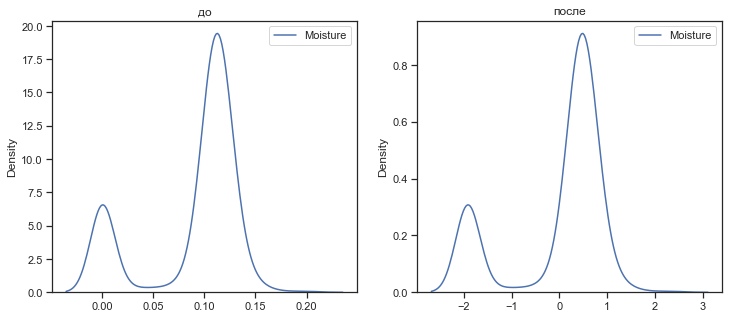

In [336]:
# Обучаем StandardScaler на всей выборке и масштабируем
weight_standard_scaler = StandardScaler().fit_transform(X_train[scale_cols])
# формируем DataFrame на основе массива
weight_standard_scaler =  to_df(weight_standard_scaler, scale_cols)
kde(scale_cols, X_train, weight_standard_scaler, 'до', 'после')

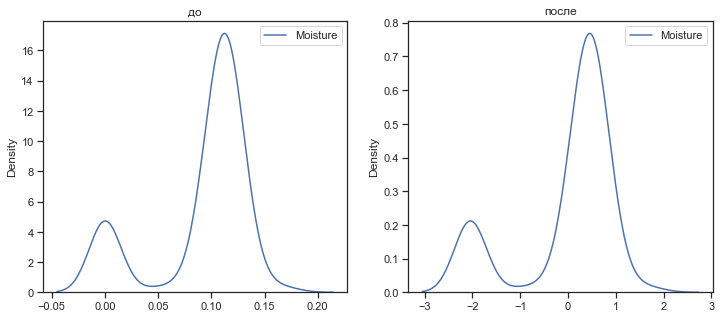

In [337]:
# Обучаем StandardScaler на всей выборке и масштабируем
weight_standard_scaler = StandardScaler().fit_transform(X_test[scale_cols])
# формируем DataFrame на основе массива
weight_standard_scaler =  to_df(weight_standard_scaler, scale_cols)
kde(scale_cols, X_test, weight_standard_scaler, 'до', 'после')

**2 способ (Mean Normalisation)**

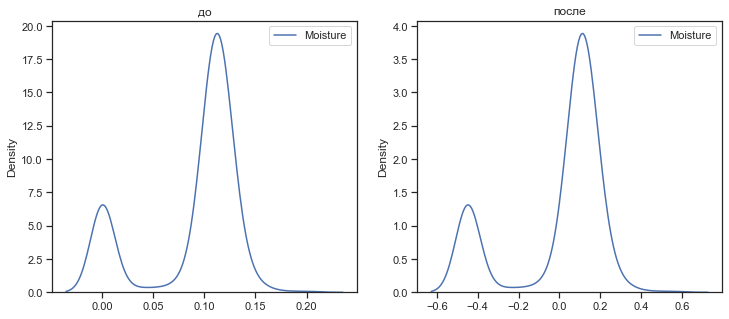

In [338]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = param_df.mean(axis=0)
        maxs = param_df.max(axis=0)
        mins = param_df.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

weight_standard_scaler = MeanNormalisation().fit_transform(X_train[scale_cols])
weight_standard_scaler =  to_df(weight_standard_scaler, scale_cols)
kde(scale_cols, X_train, weight_standard_scaler, 'до', 'после')

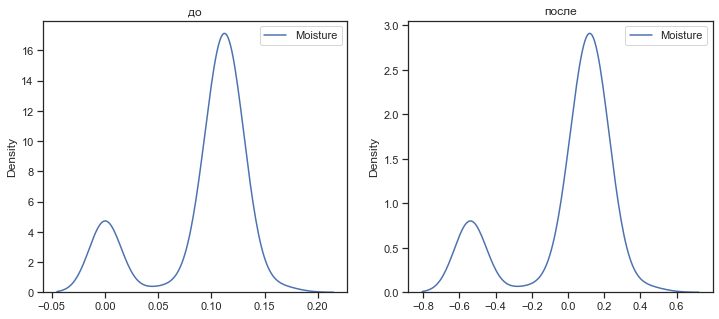

In [339]:
weight_standard_scaler = MeanNormalisation().fit_transform(X_test[scale_cols])
weight_standard_scaler =  to_df(weight_standard_scaler, scale_cols)
kde(scale_cols, X_test, weight_standard_scaler, 'до', 'после')

**3 способ (по медиане)**

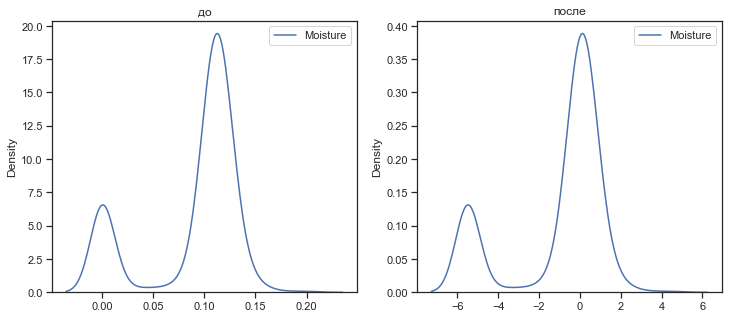

In [340]:
from sklearn.preprocessing import RobustScaler

weight_standard_scaler = RobustScaler().fit_transform(X_train[scale_cols])
weight_standard_scaler =  to_df(weight_standard_scaler, scale_cols)
kde(scale_cols, X_train, weight_standard_scaler, 'до', 'после')

In [341]:
weight_standard_scaler = RobustScaler().fit_transform(X_test[scale_cols])
weight_standard_scaler =  to_df(weight_standard_scaler, scale_cols)
kde(scale_cols, X_test, weight_standard_scaler, 'до', 'после')

## Обработка выбросов для числовых признаков

In [342]:
numeric_columns_3 = X_train.select_dtypes(include=np.number).columns

In [343]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary 

def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [344]:
numeric_columns_3

Index(['Species', 'Owner', 'Country.of.Origin', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Owner.1',
       'Variety', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Cupper.Points', 'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Certification.Body', 'altitude_mean_meters'],
      dtype='object')

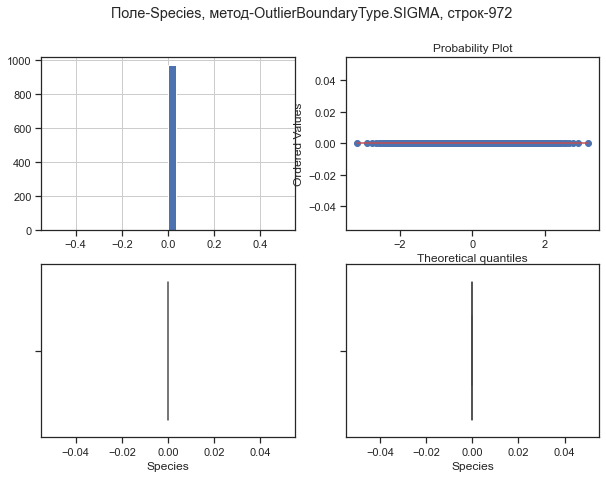

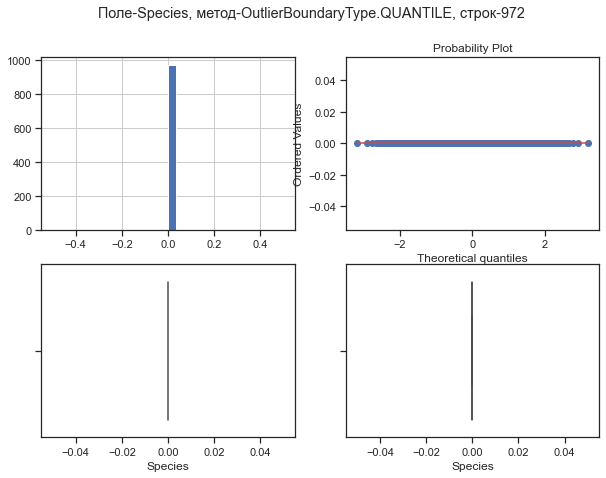

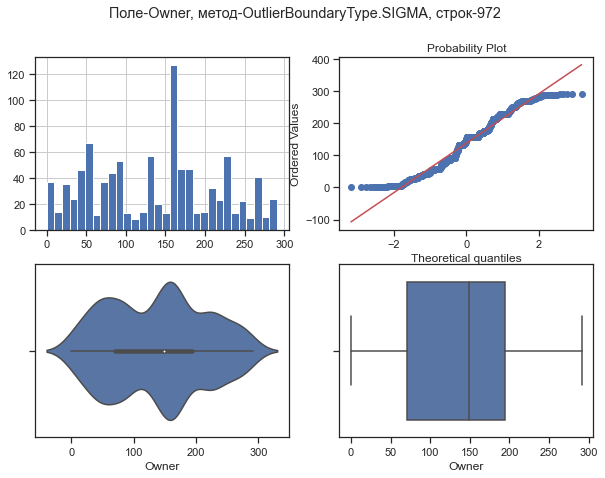

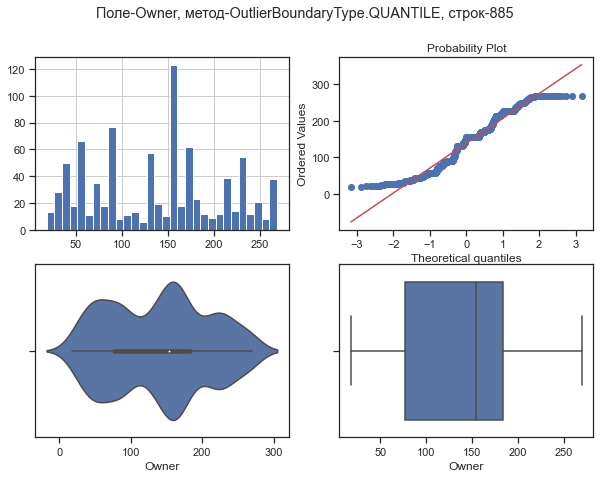

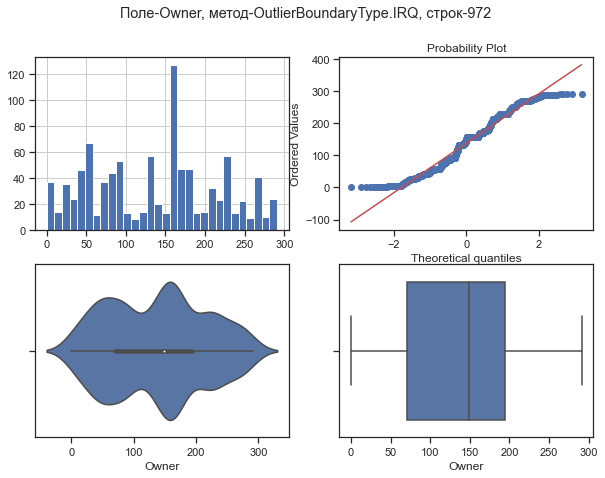

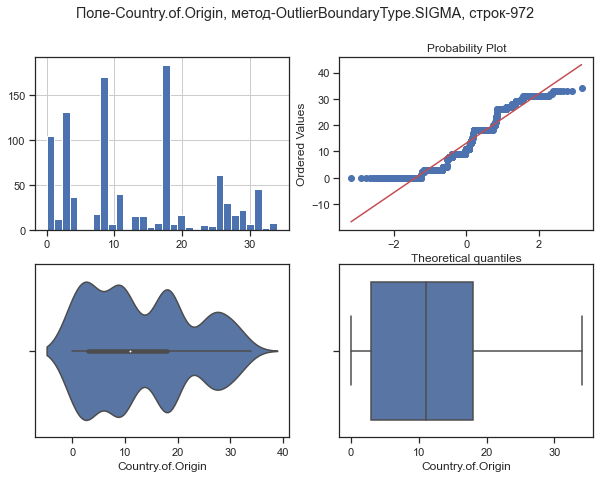

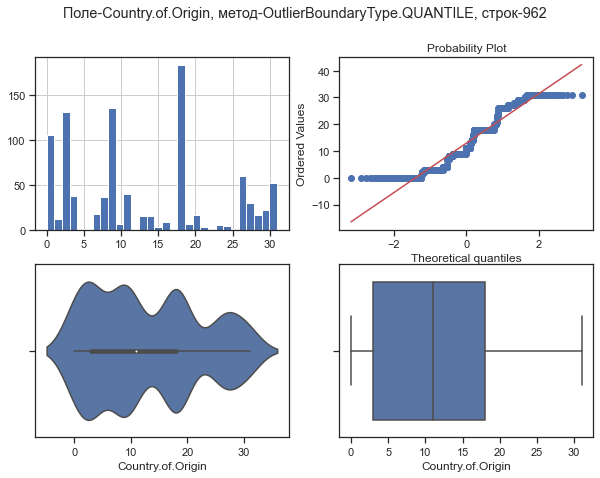

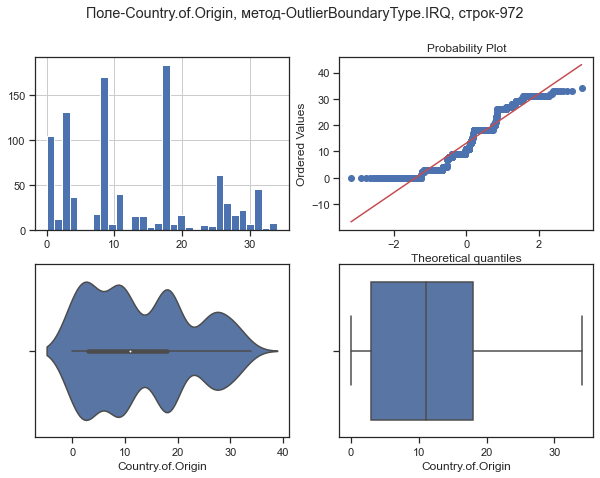

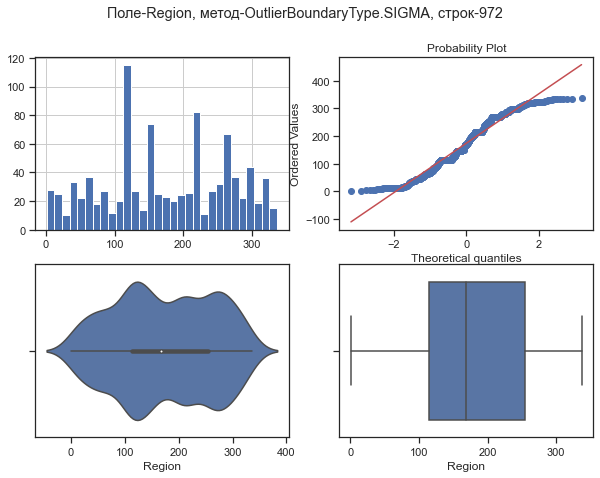

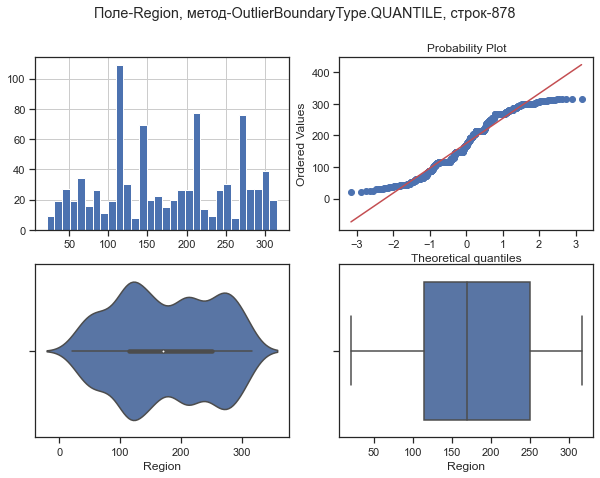

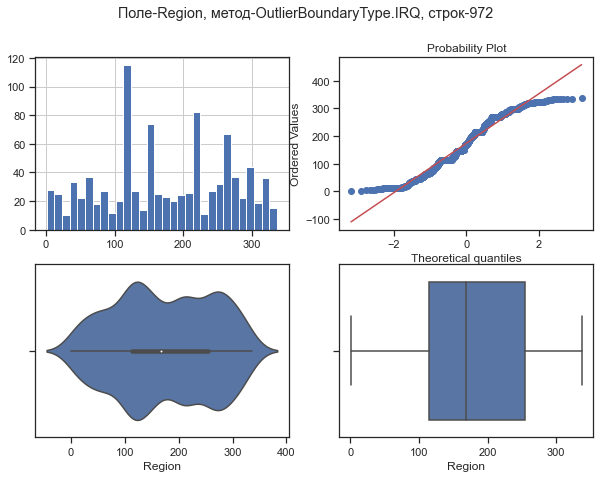

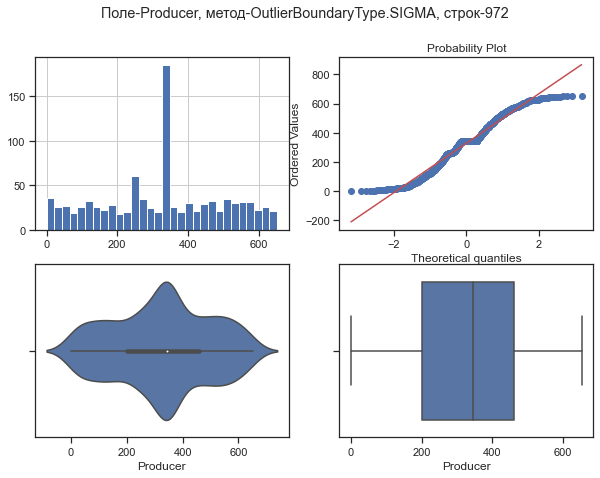

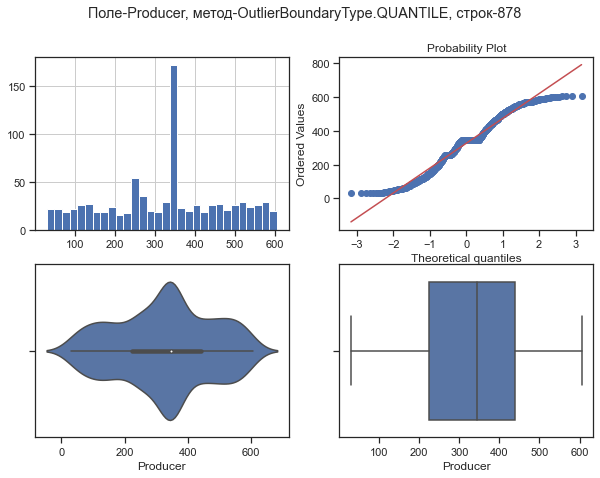

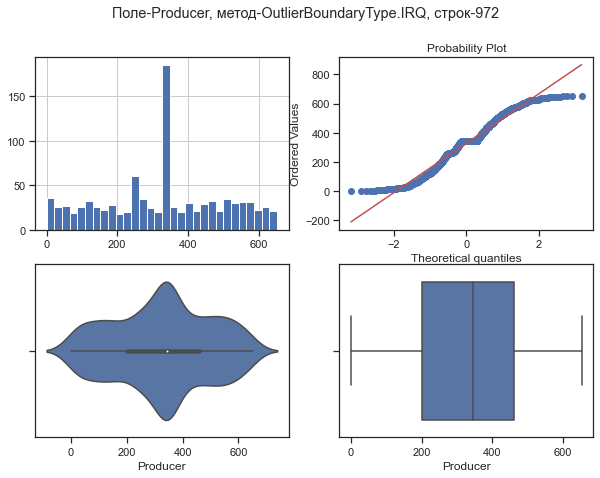

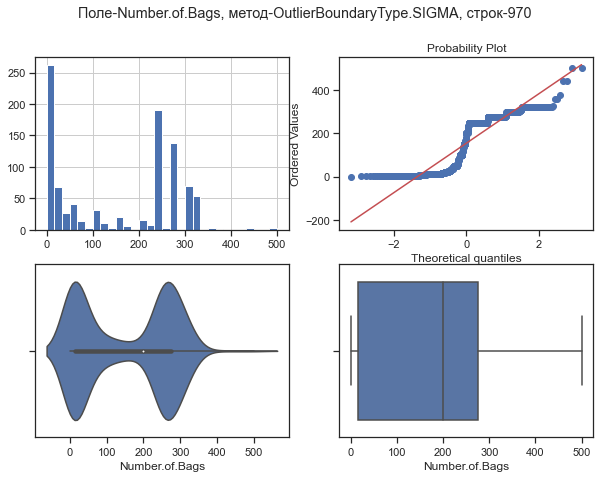

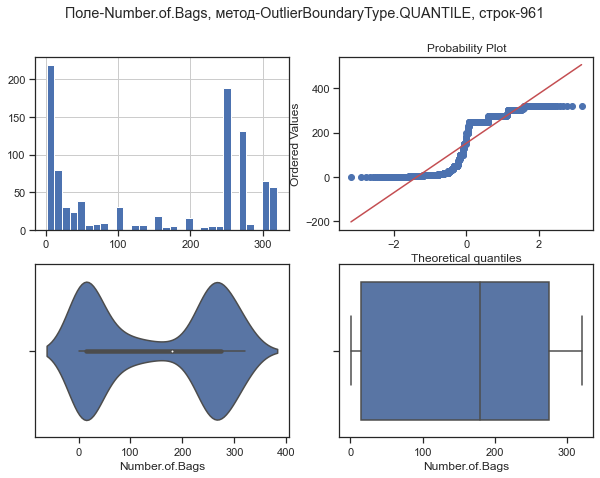

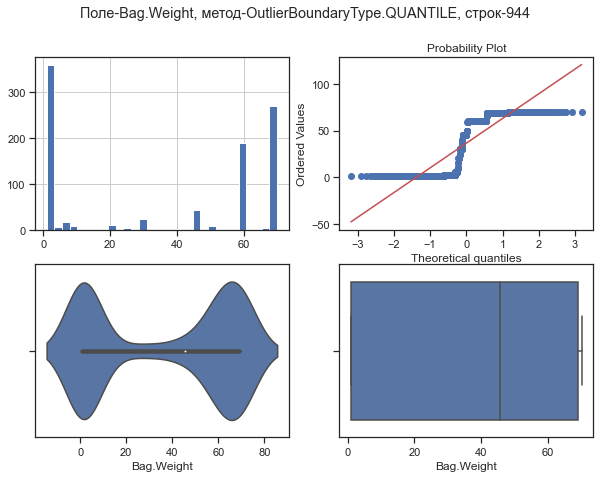

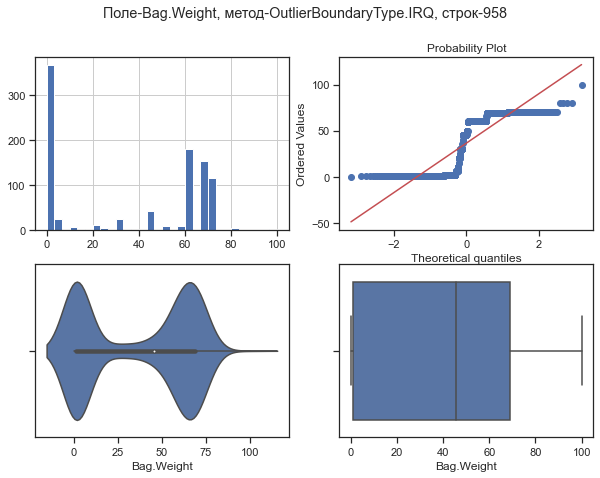

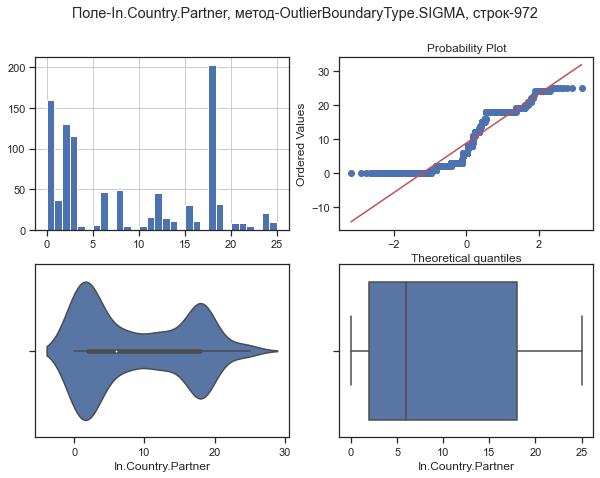

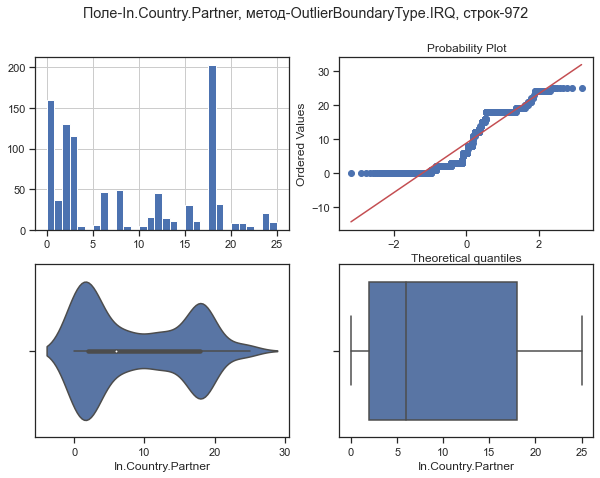

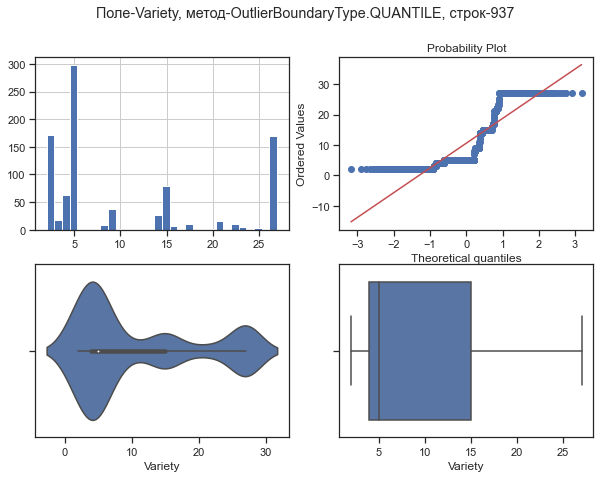

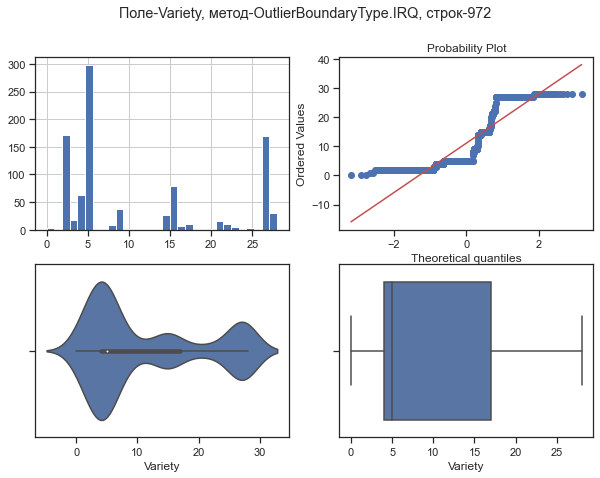

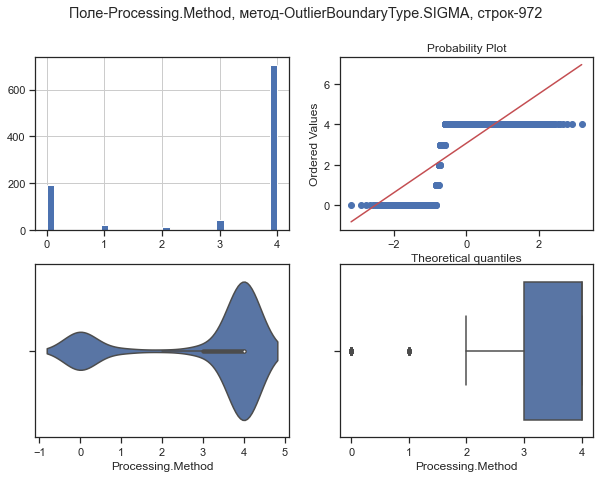

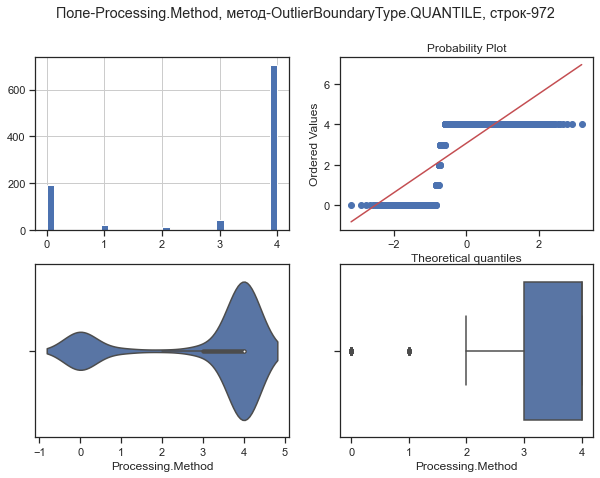

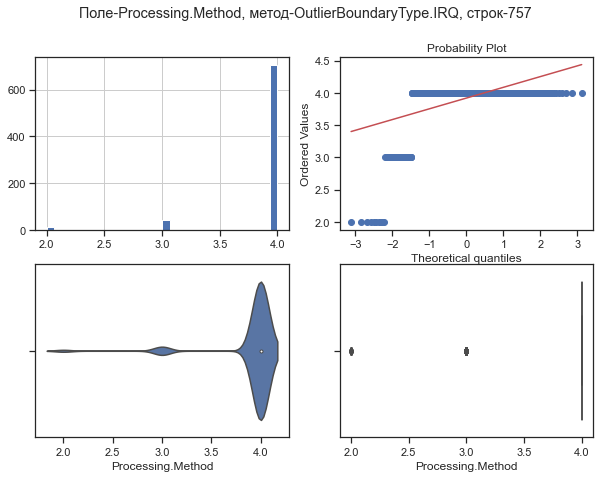

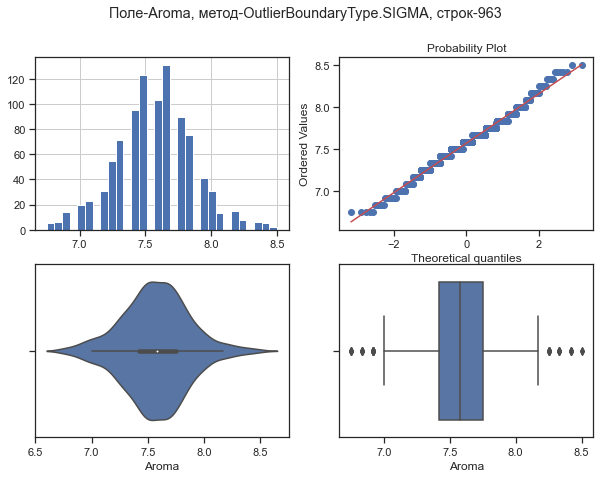

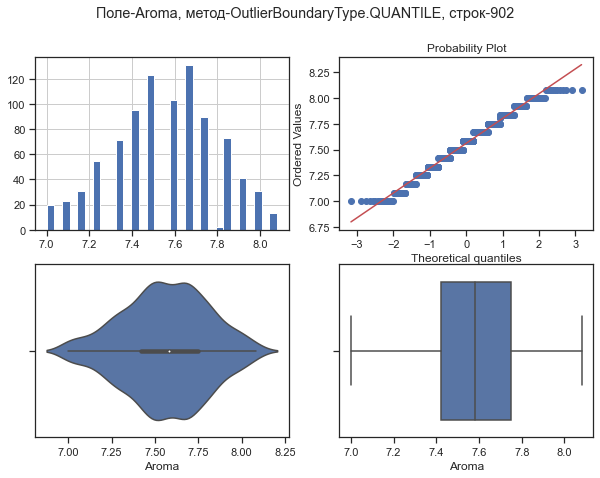

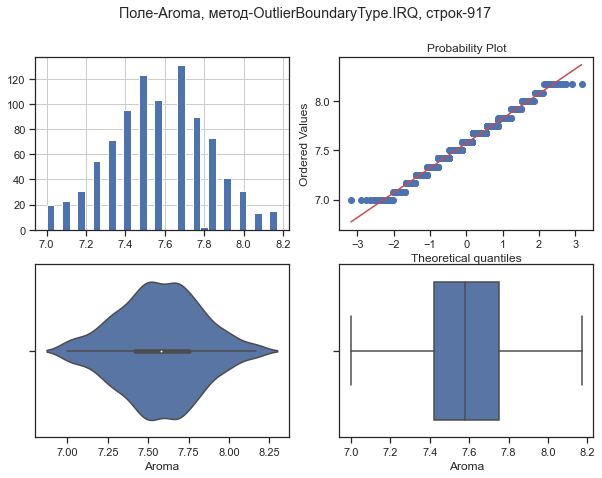

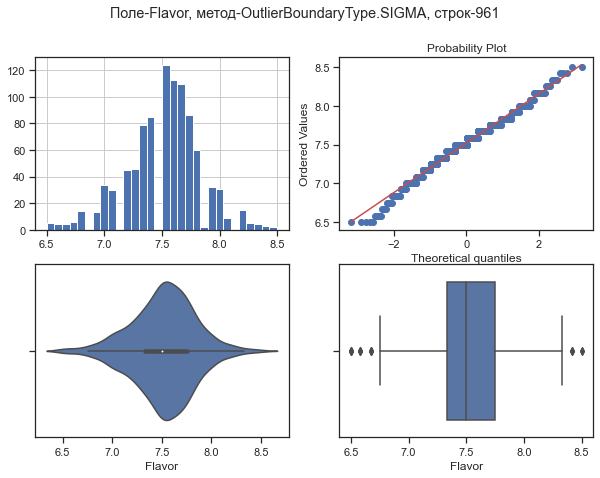

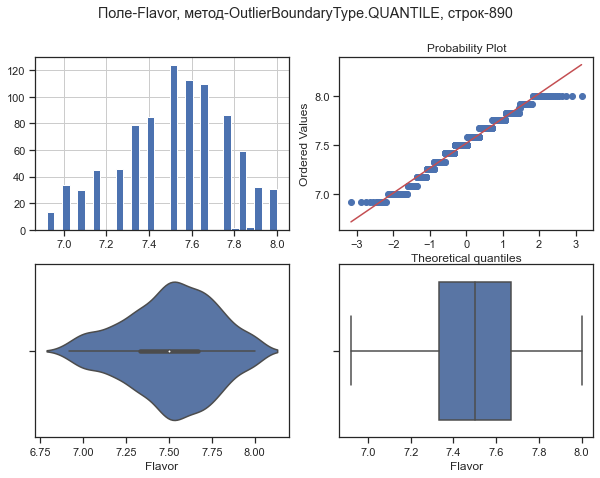

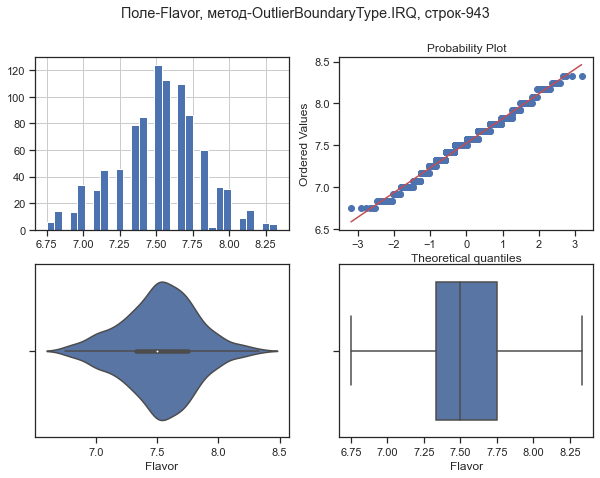

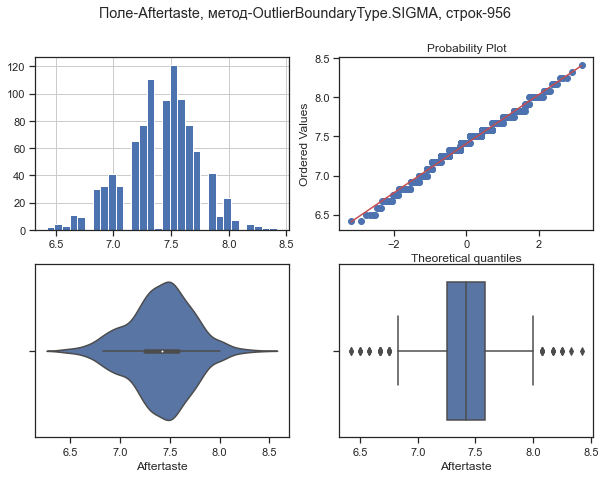

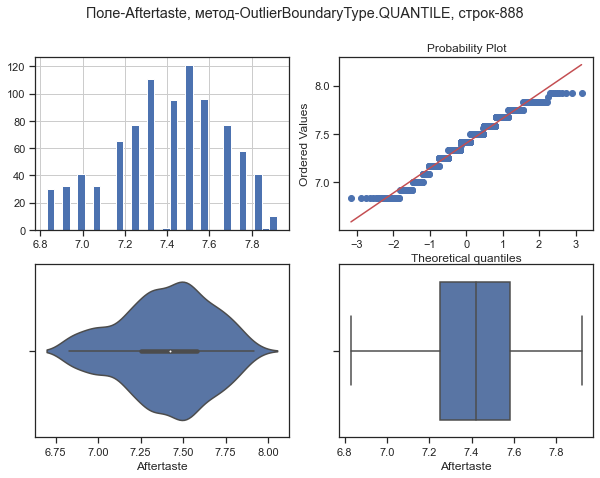

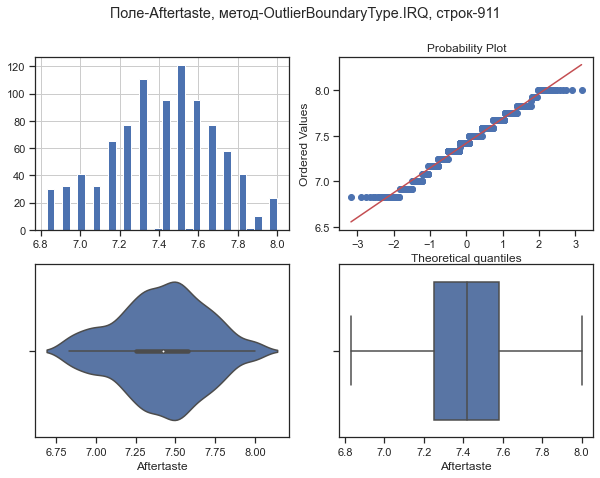

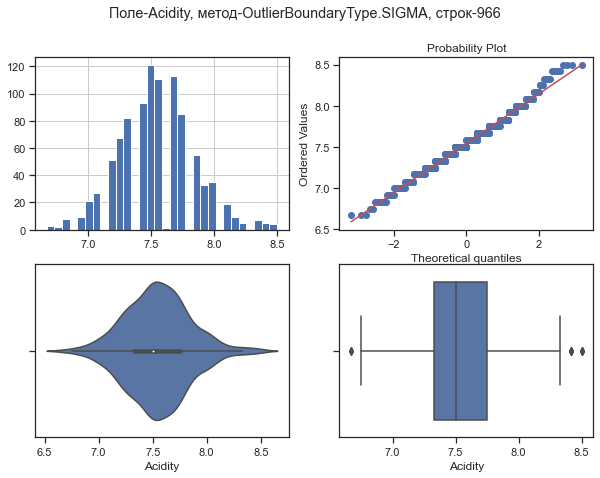

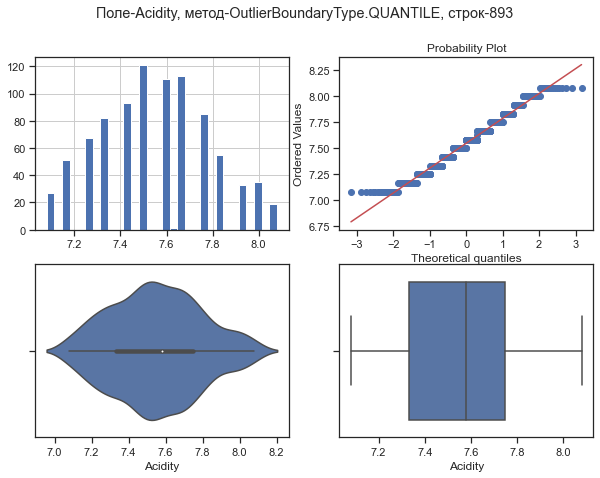

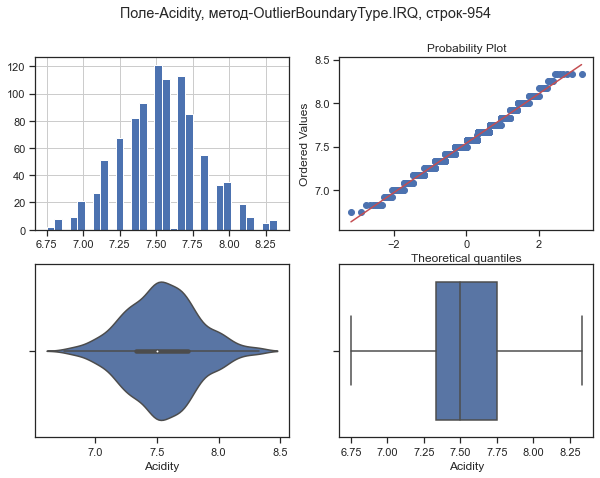

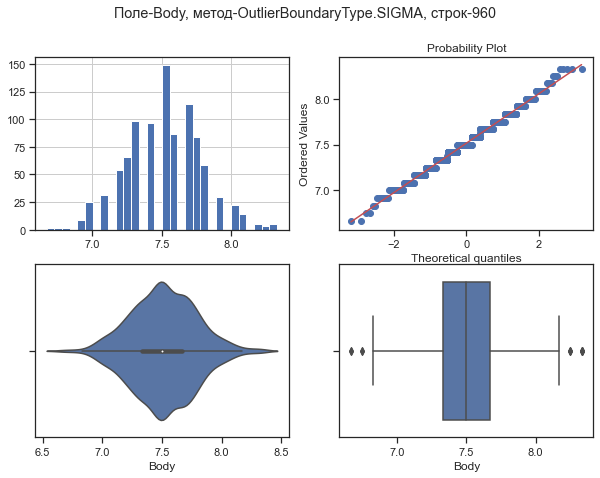

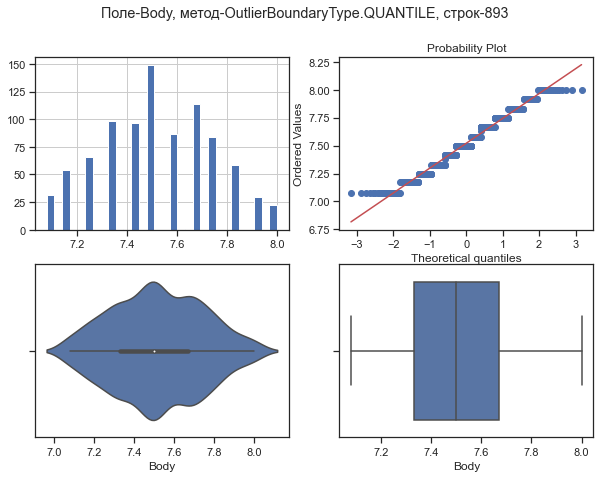

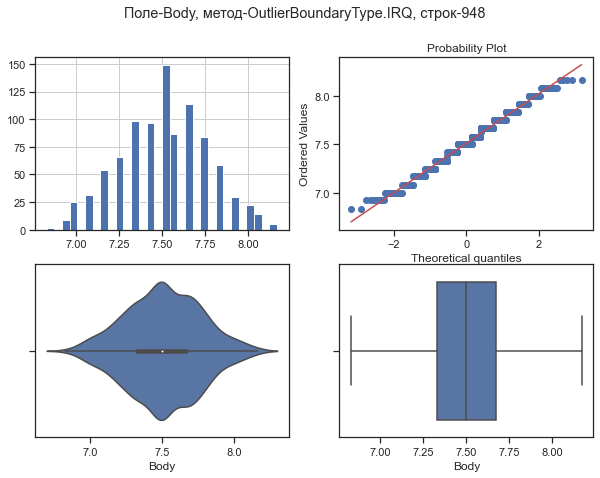

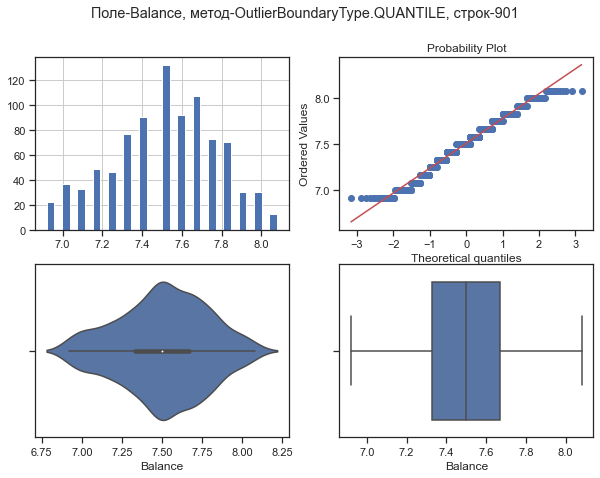

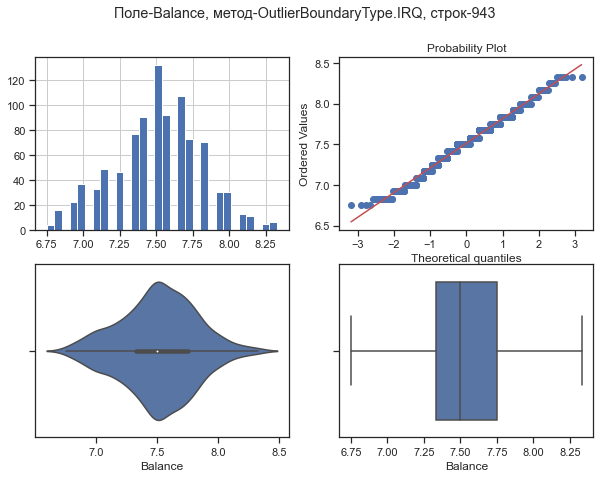

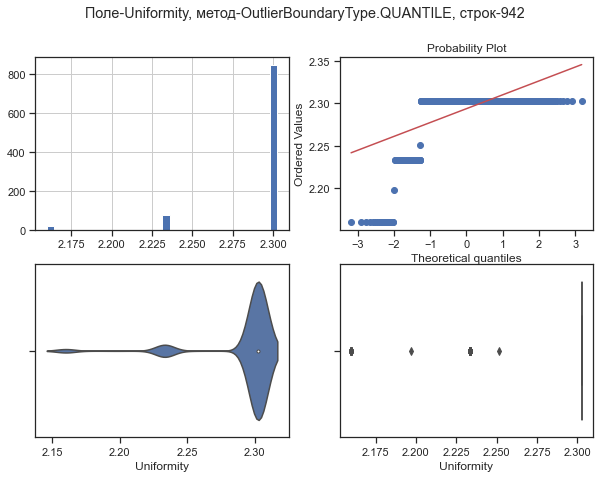

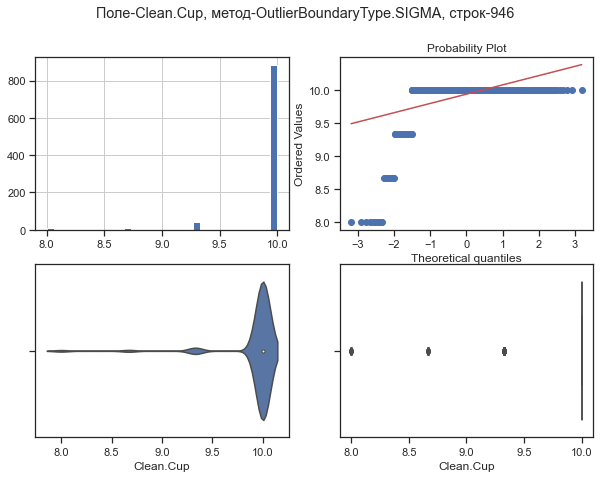

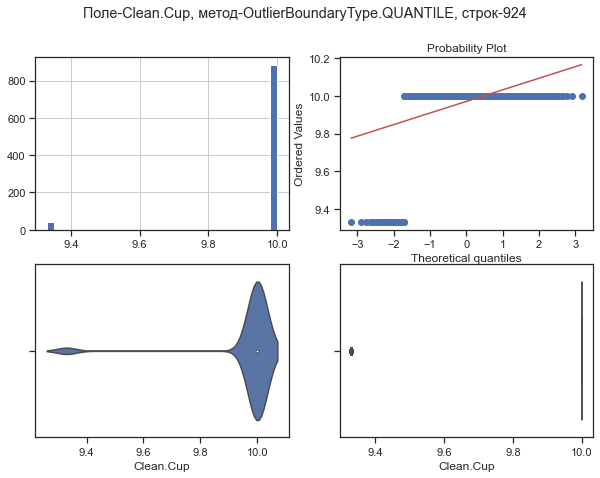

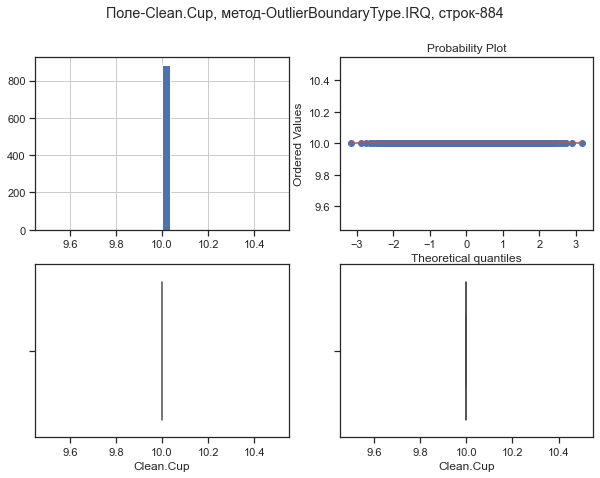

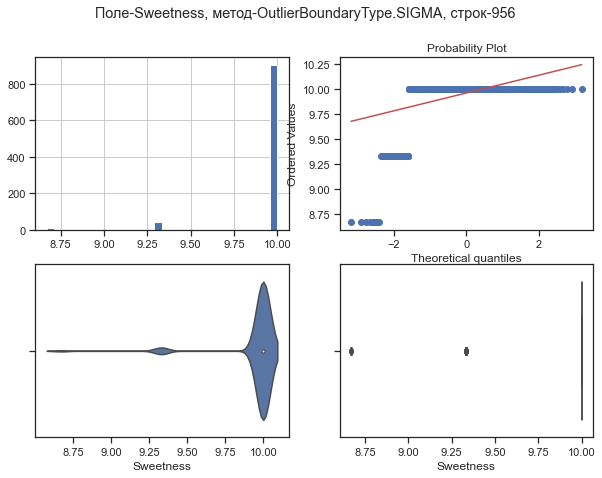

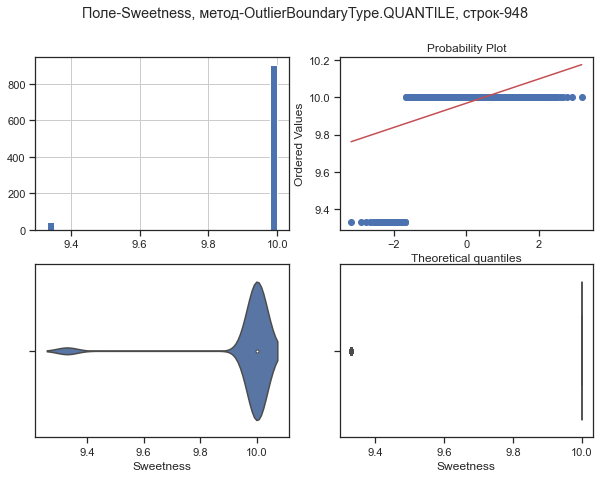

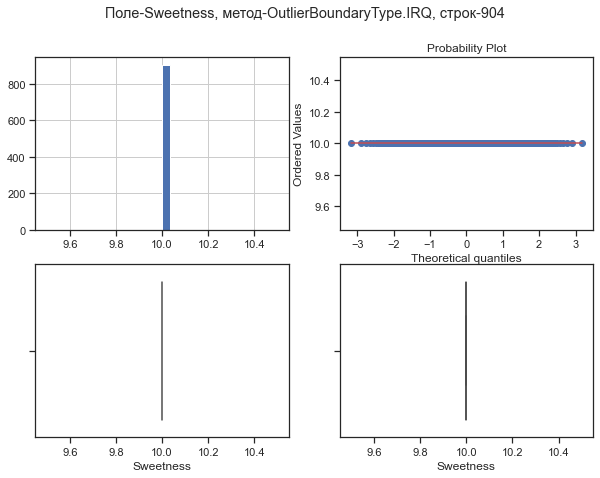

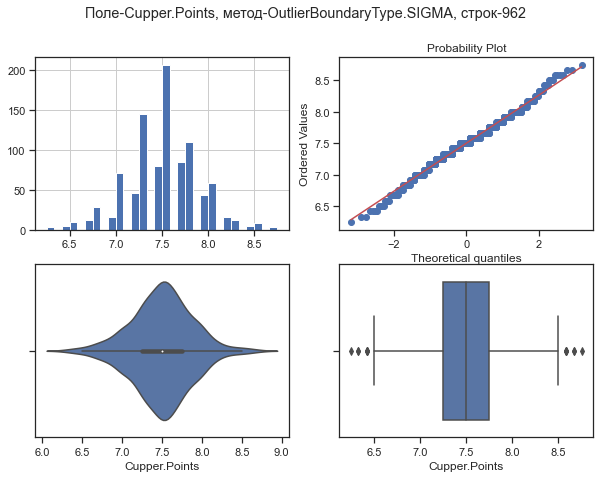

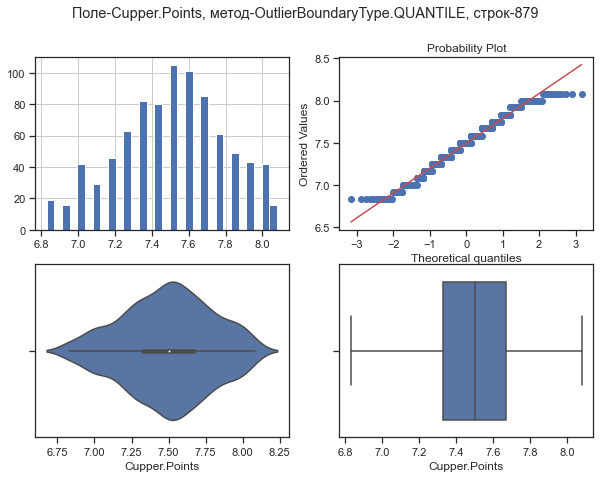

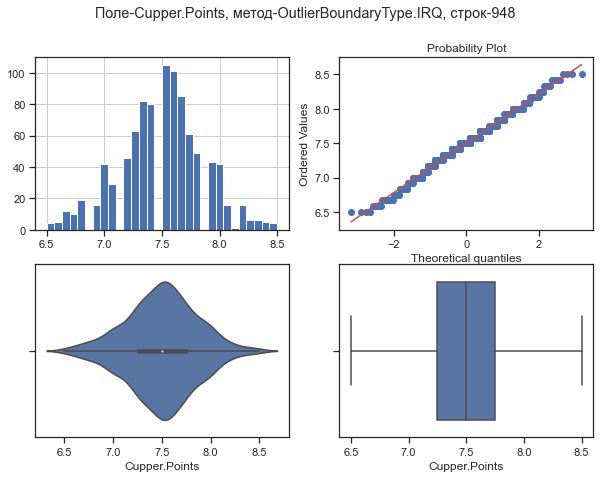

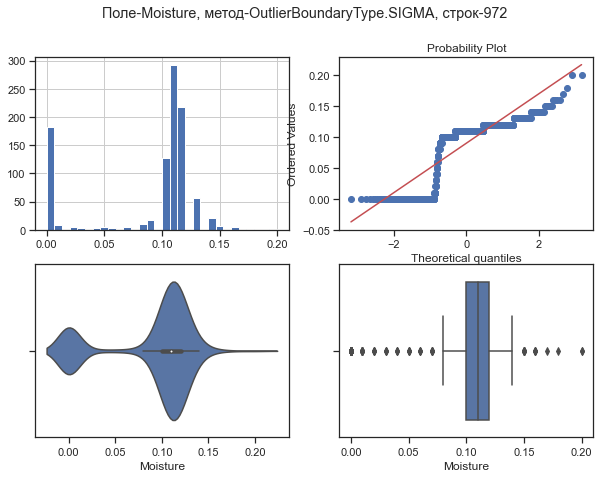

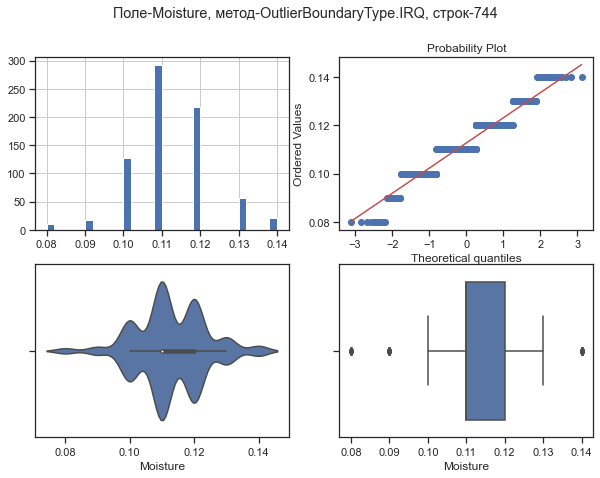

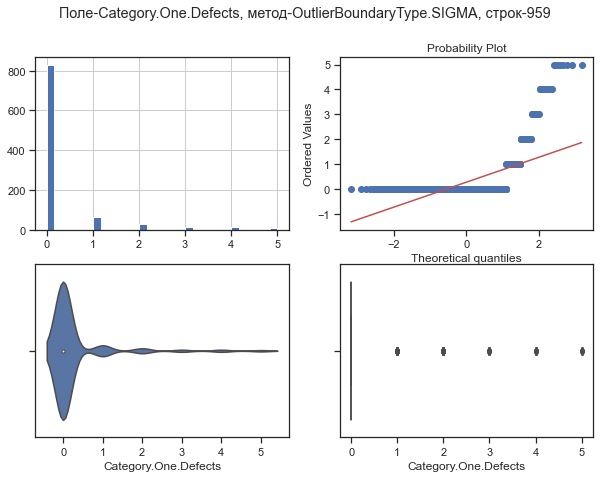

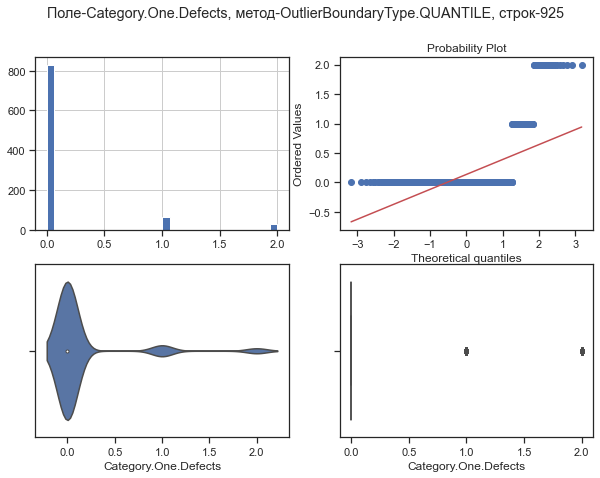

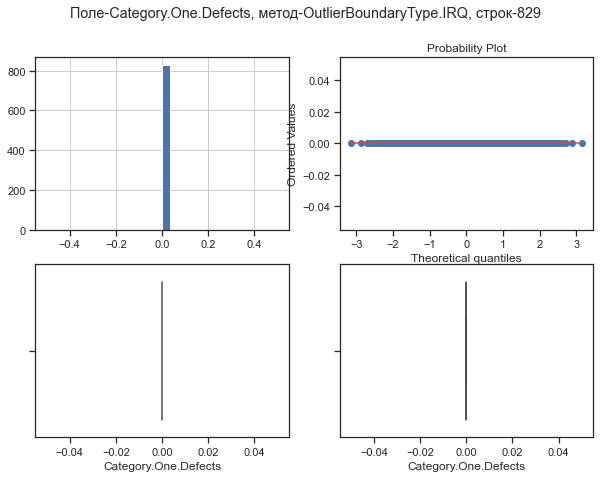

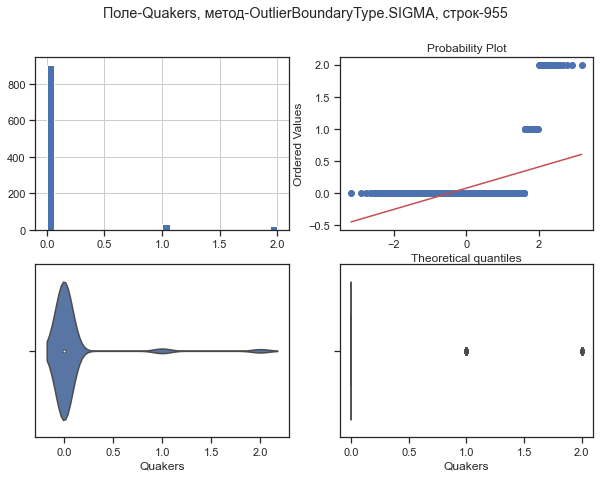

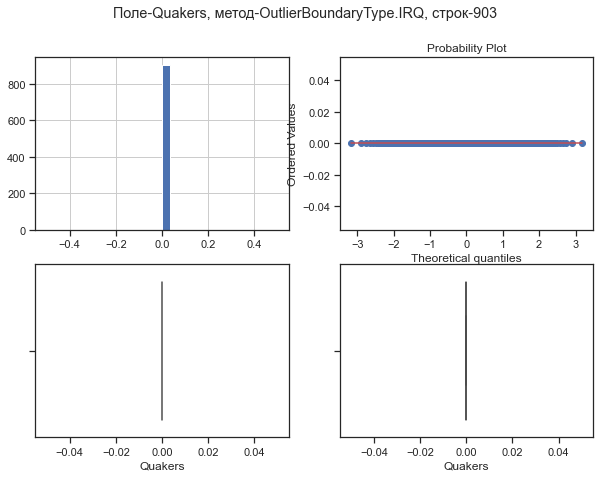

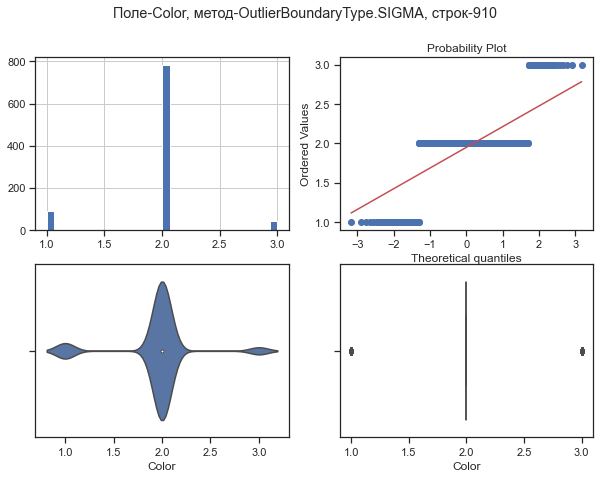

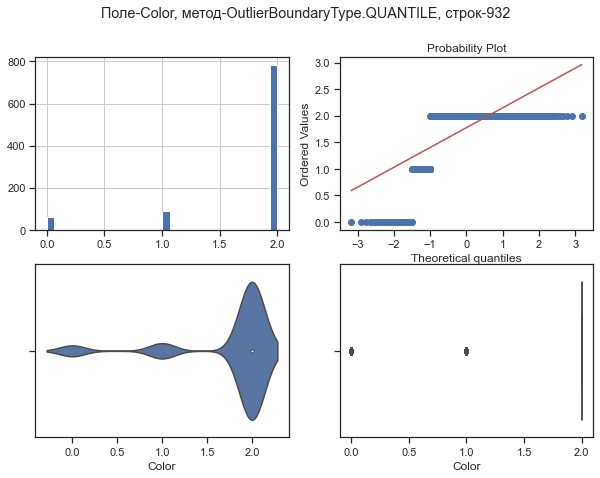

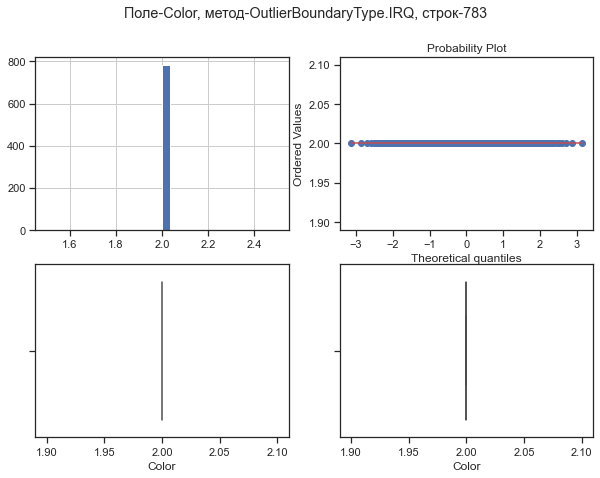

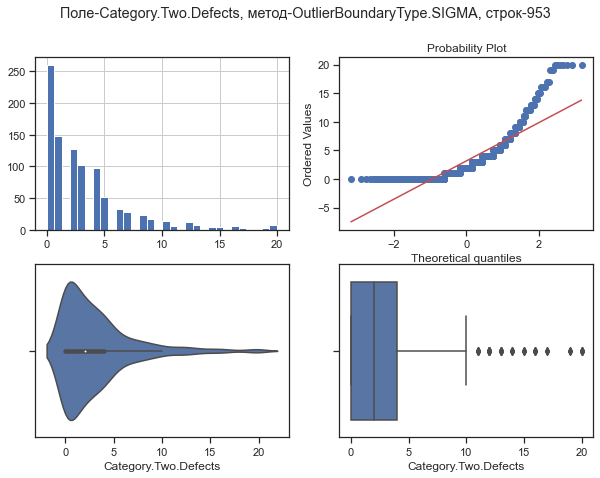

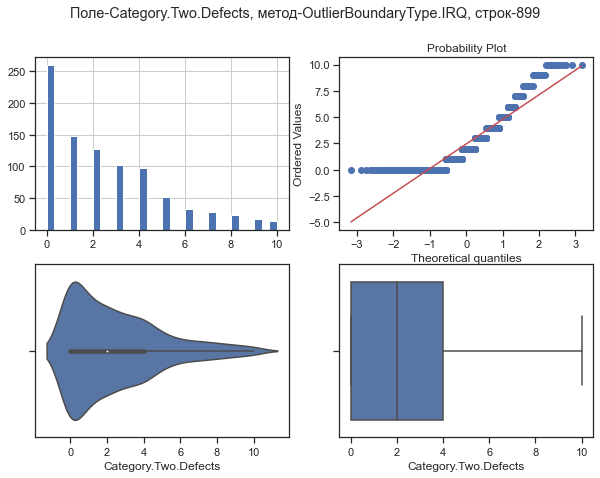

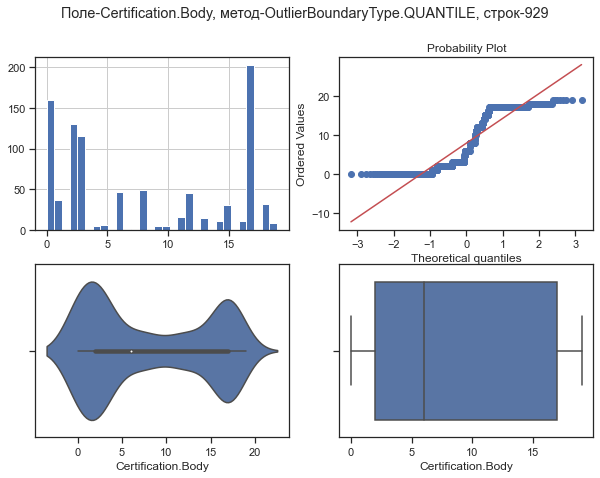

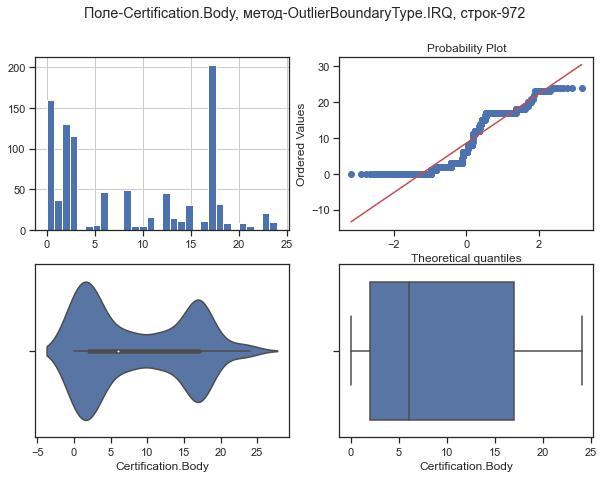

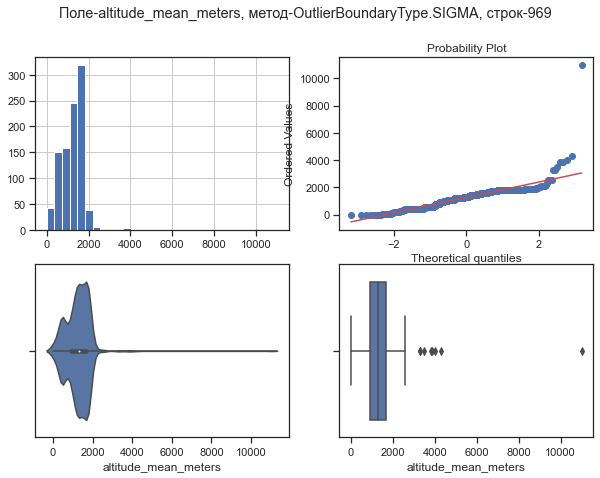

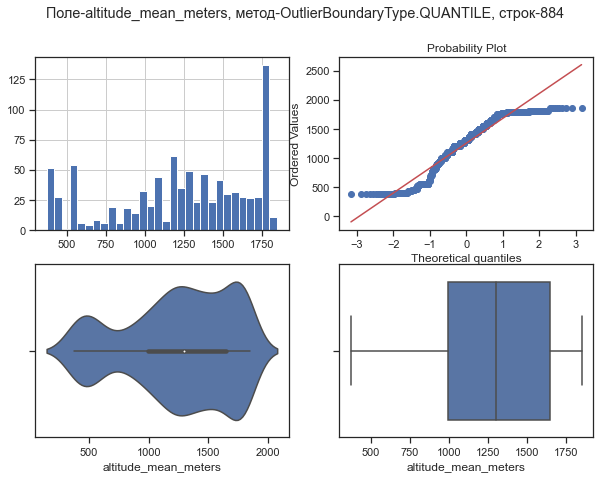

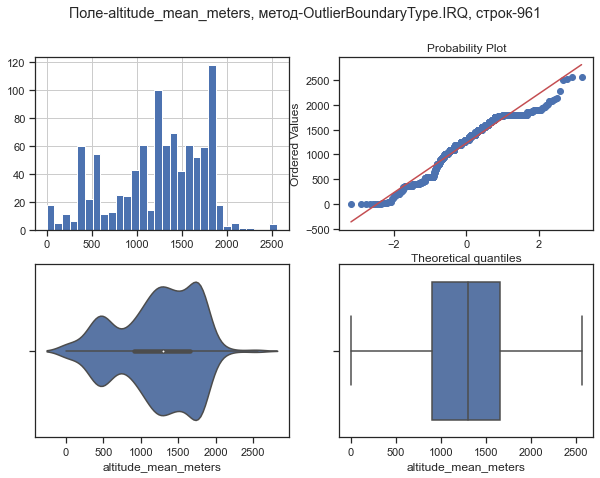

In [345]:
for col in numeric_columns_3:
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(X_train, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(X_train[col] > upper_boundary, True, 
                                 np.where(X_train[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = X_train.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

**Замена выбросов**

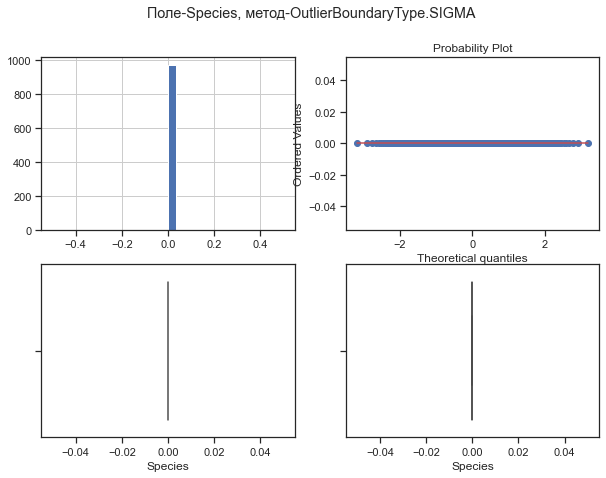

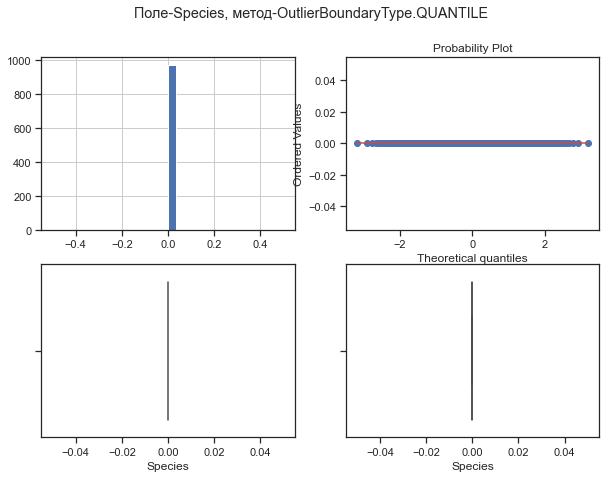

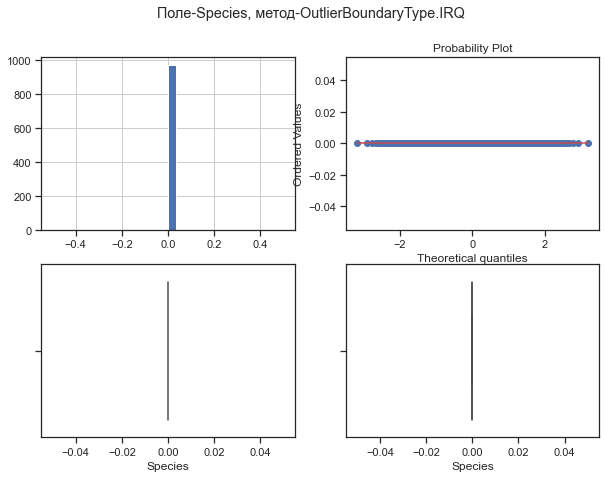

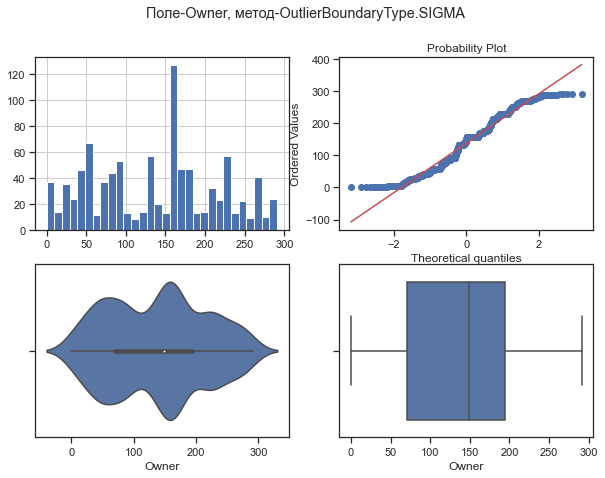

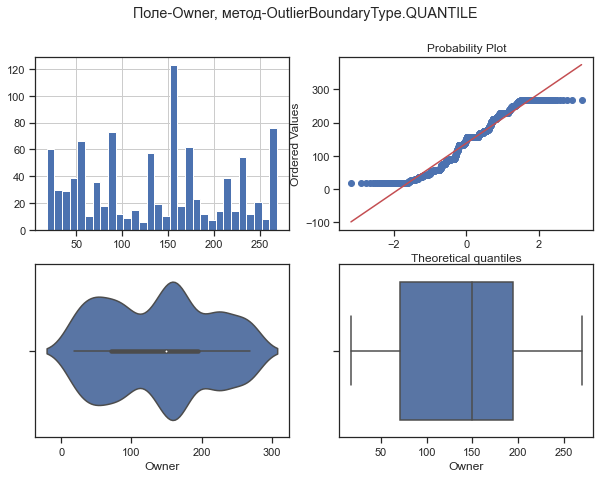

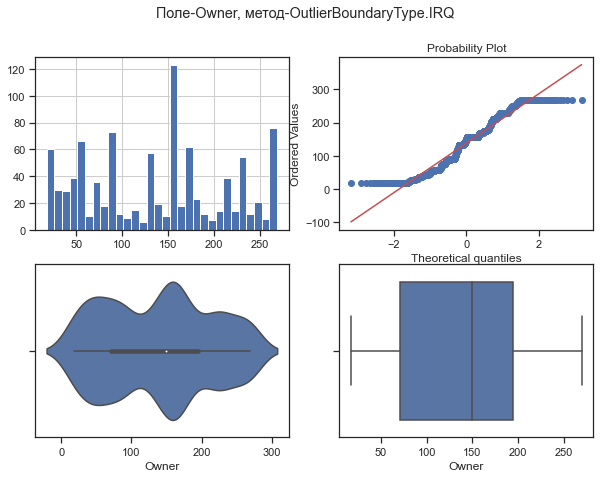

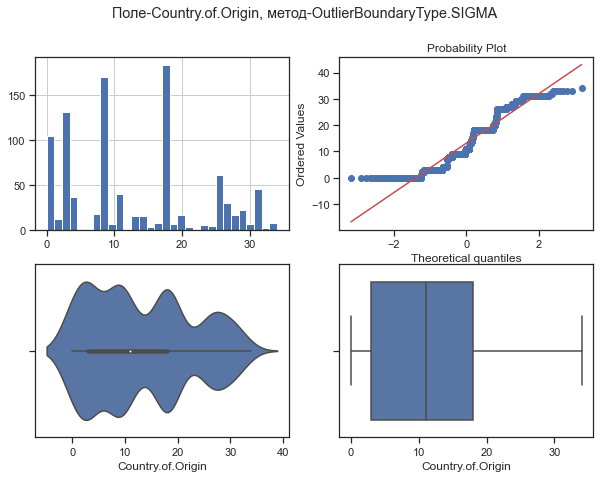

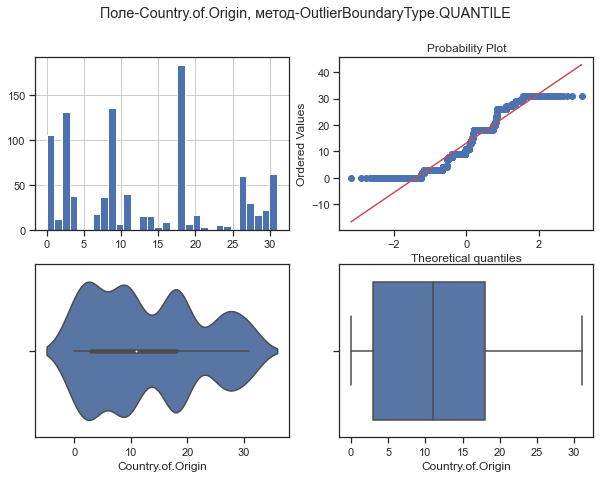

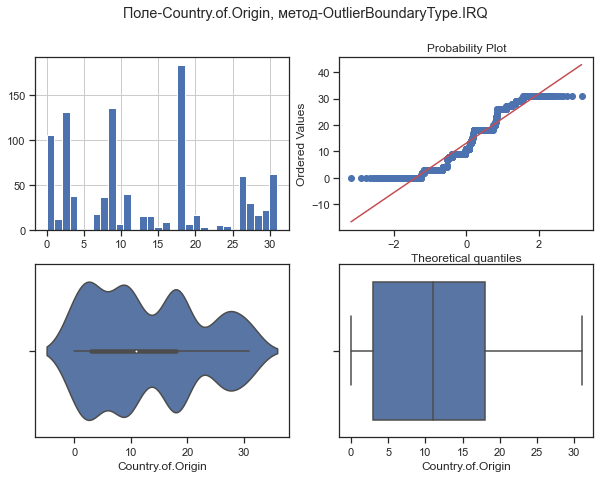

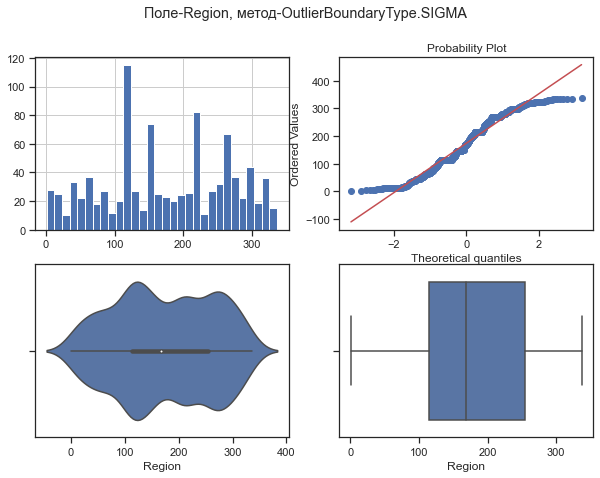

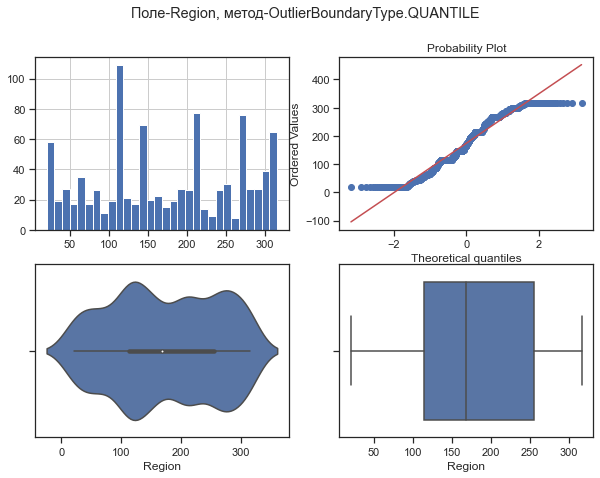

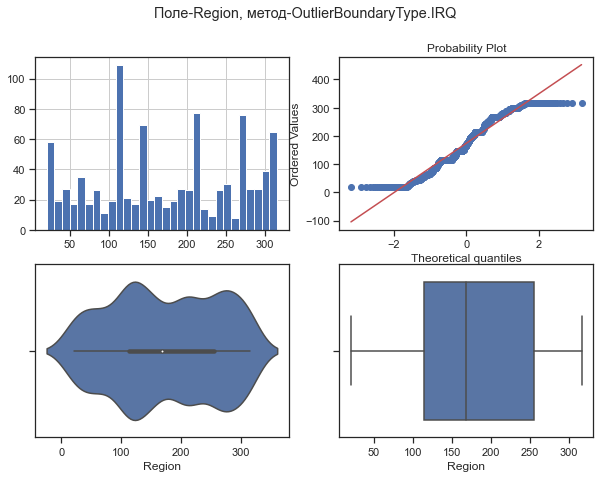

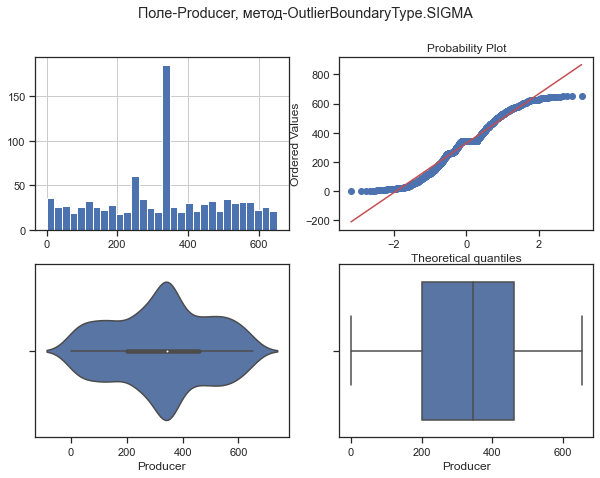

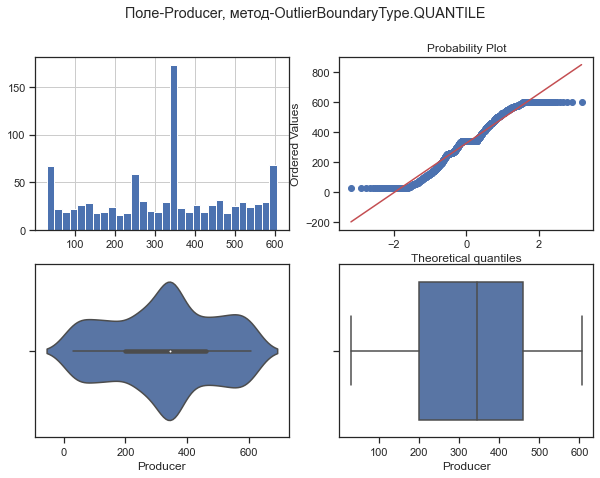

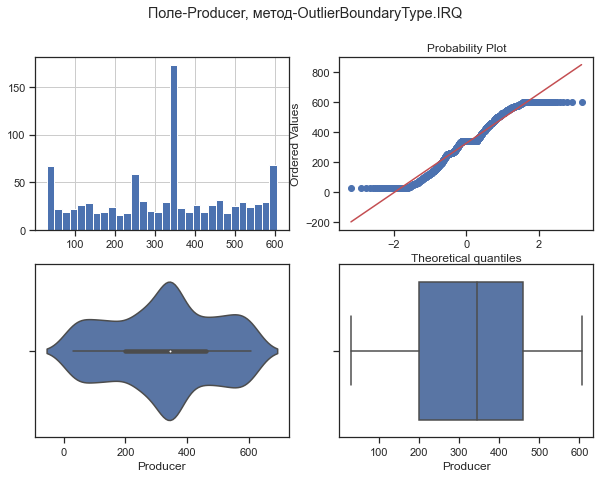

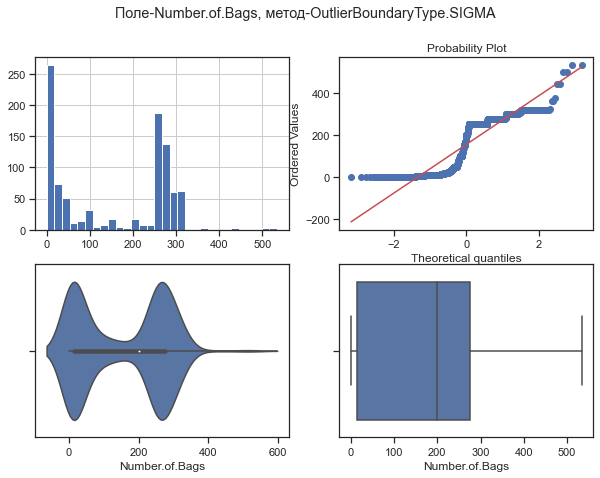

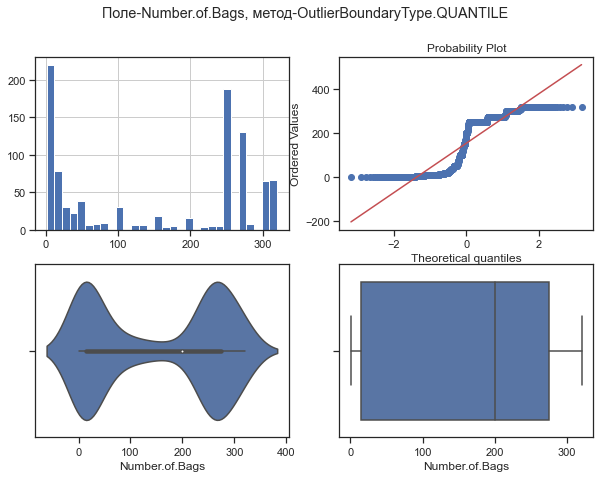

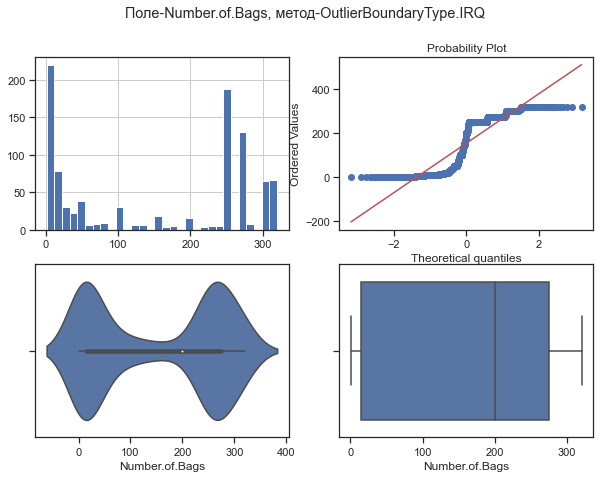

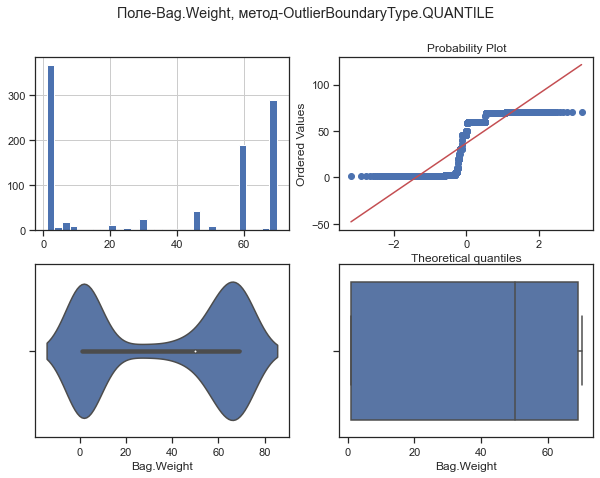

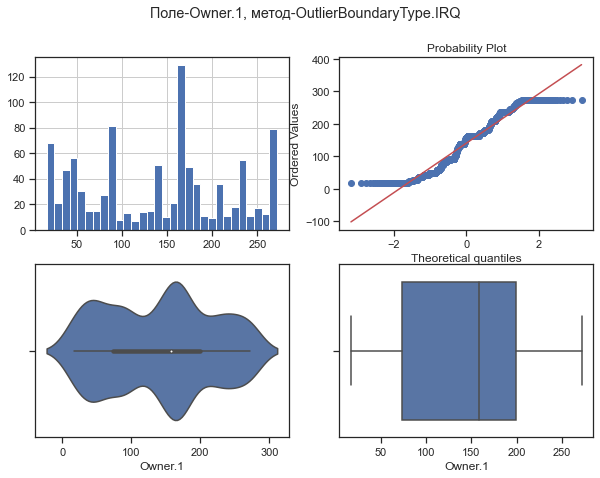

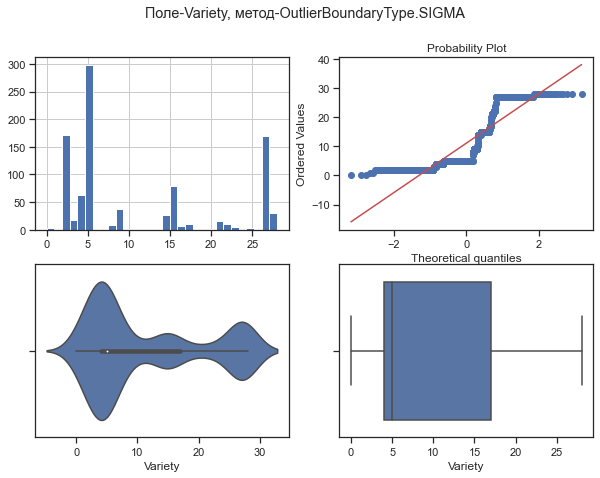

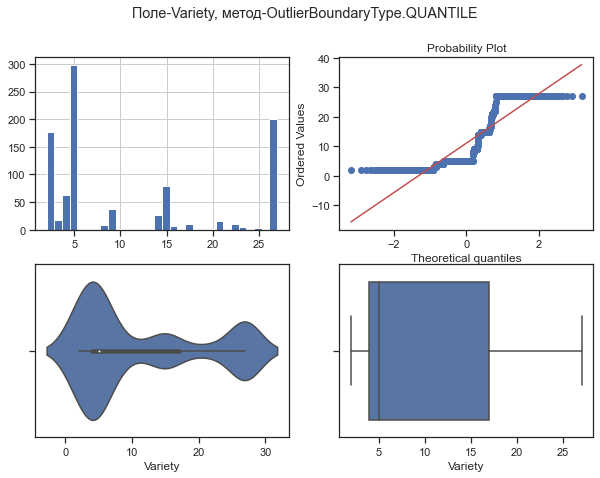

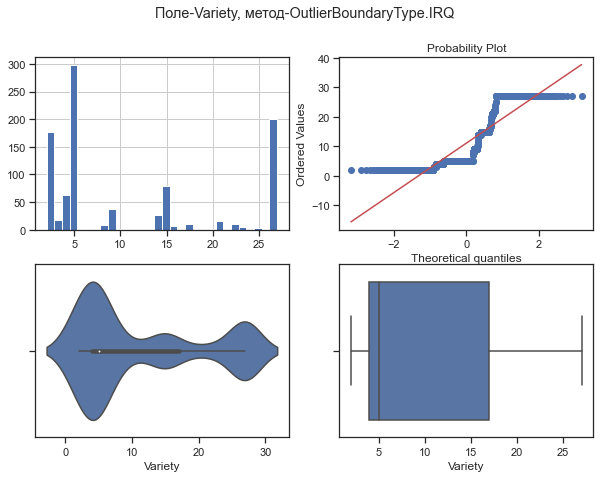

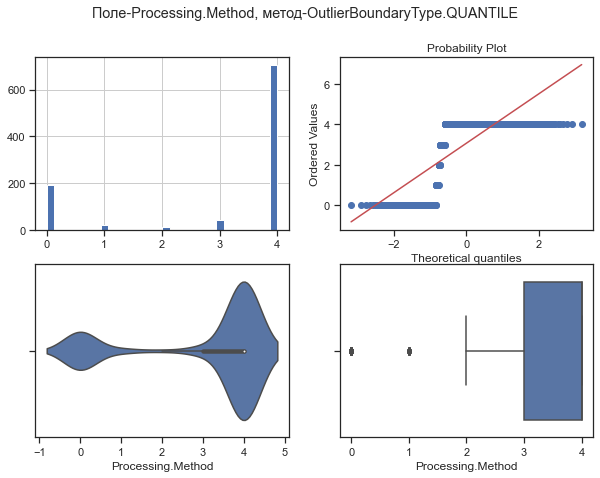

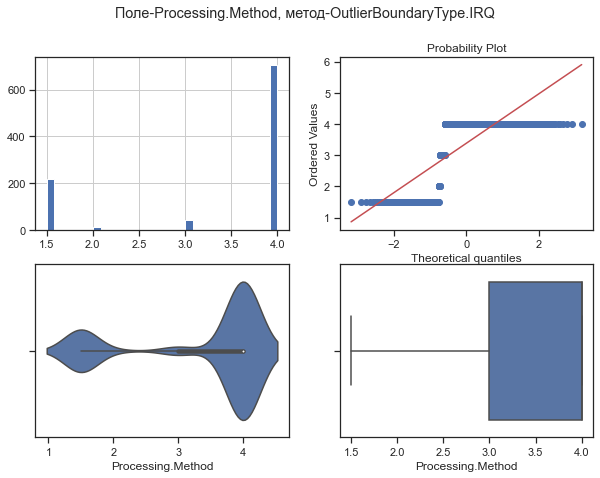

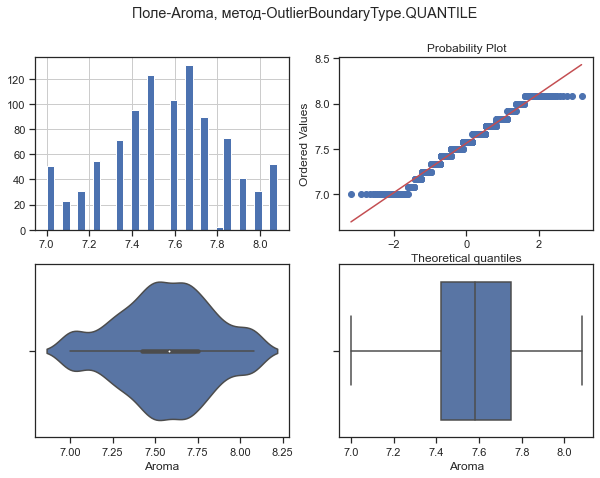

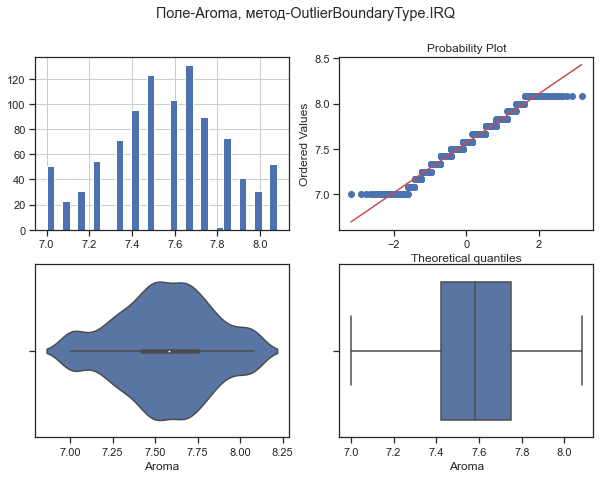

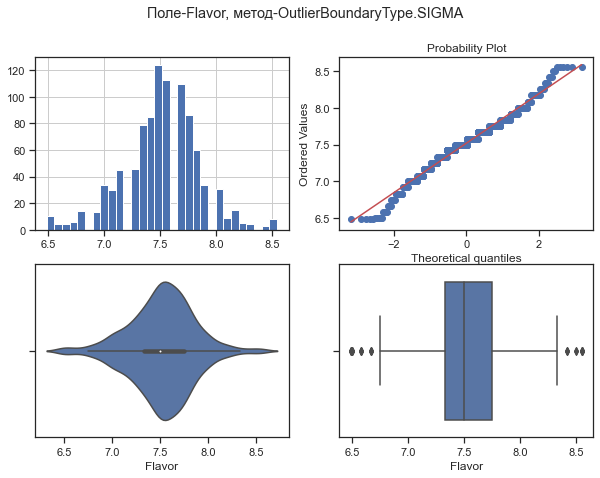

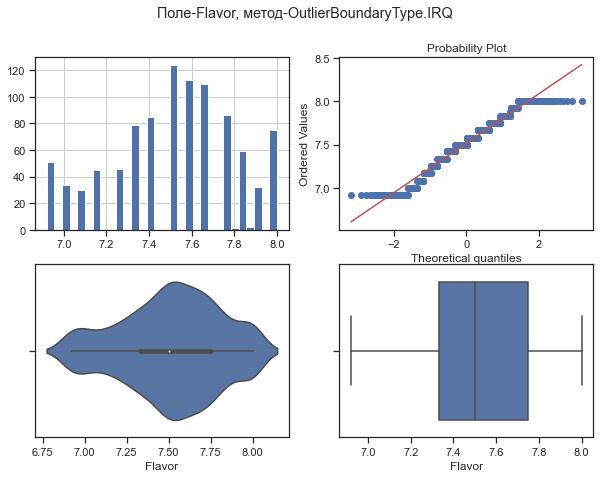

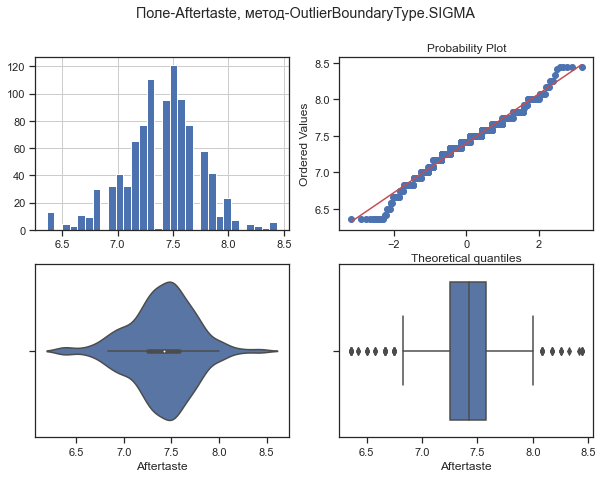

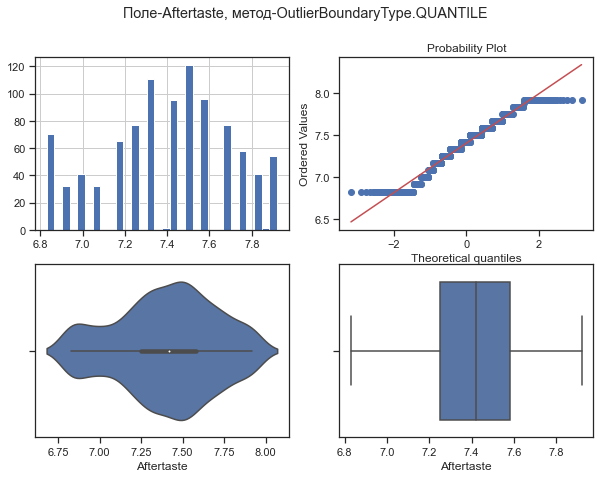

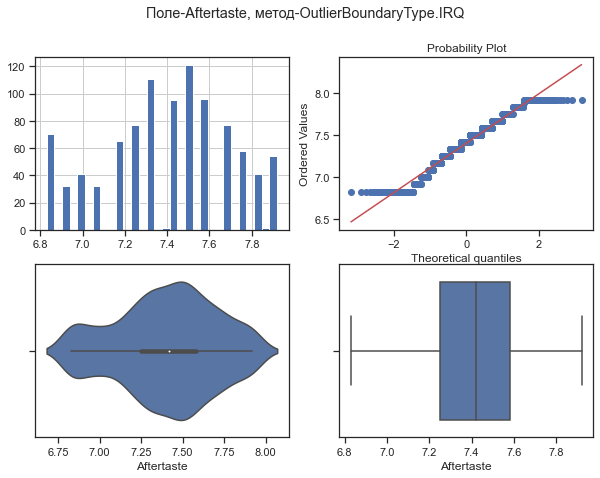

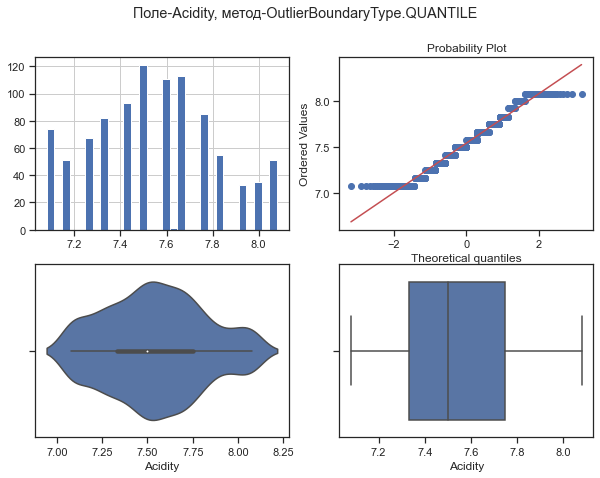

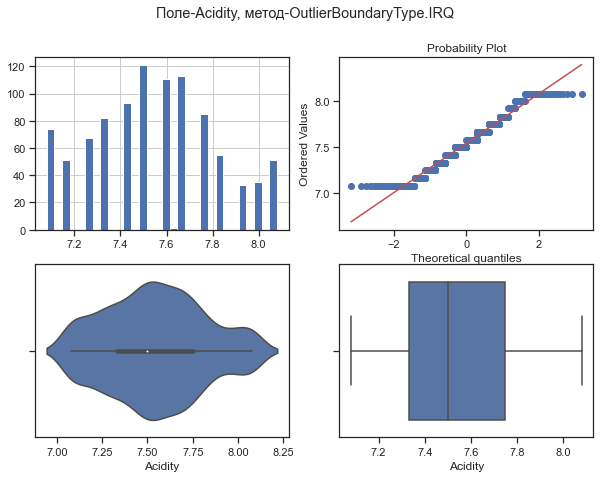

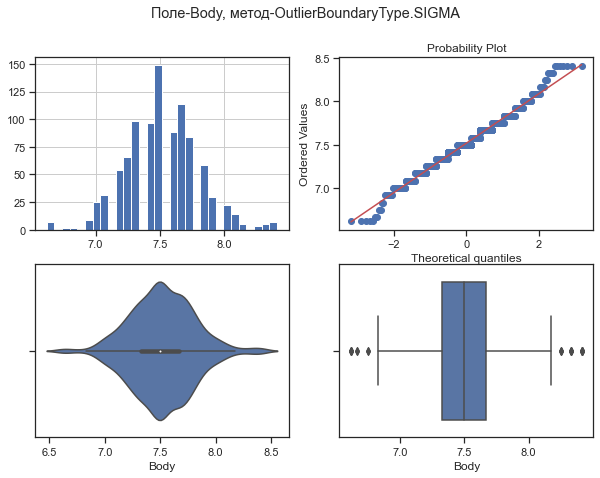

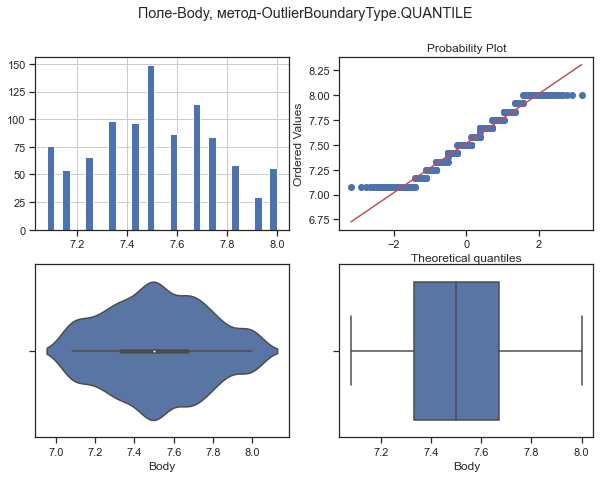

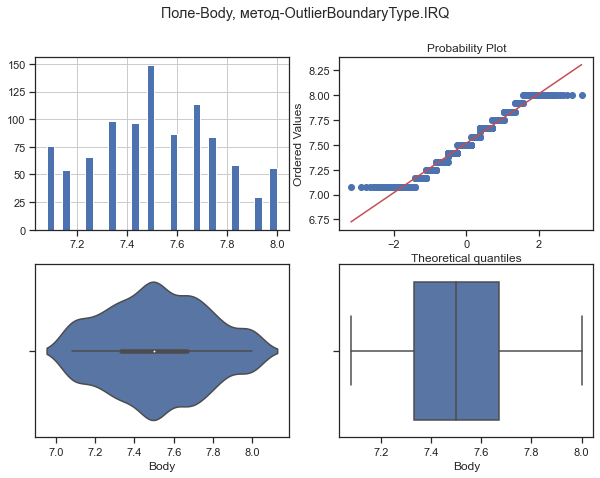

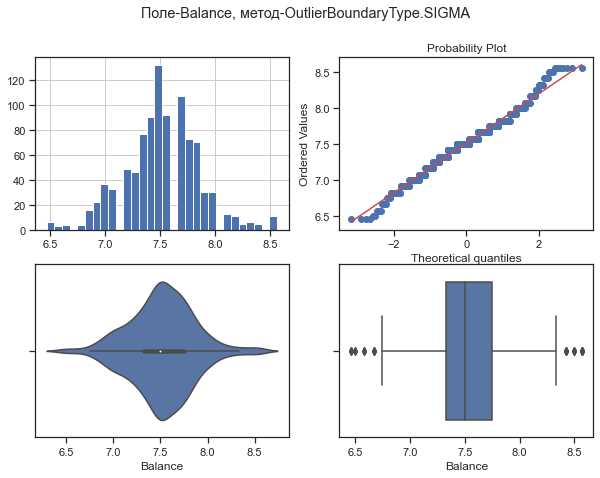

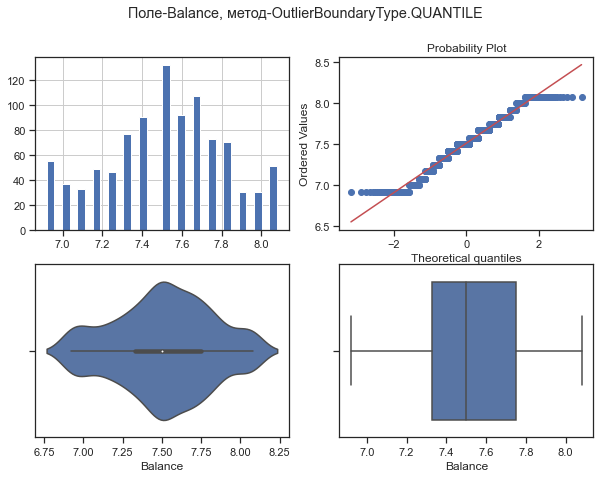

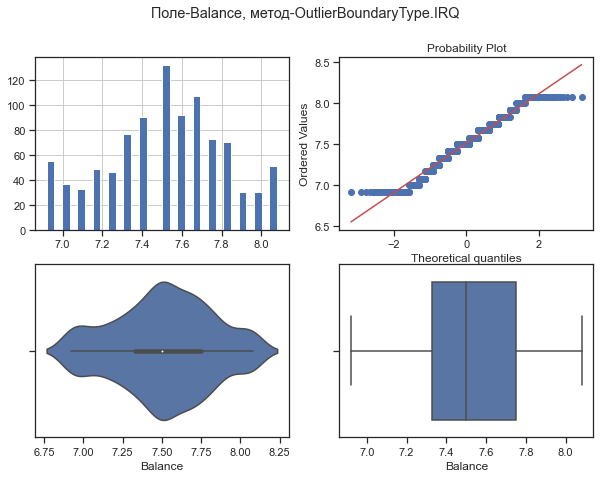

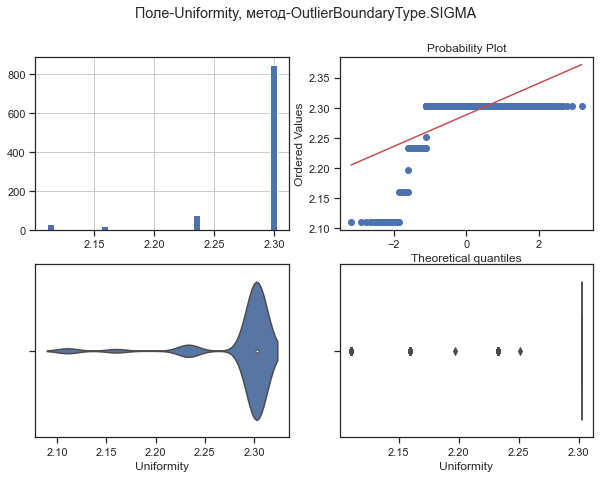

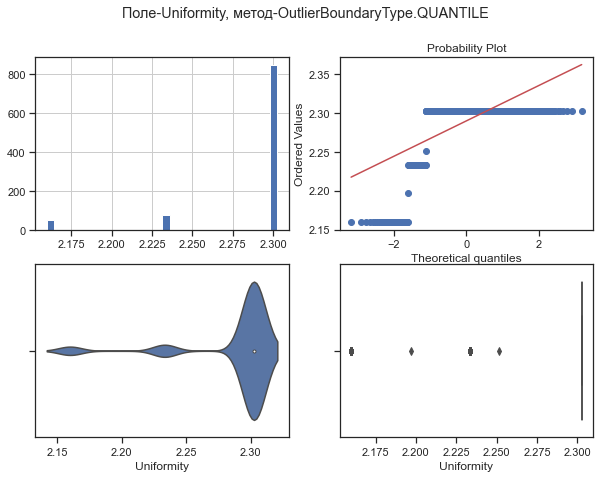

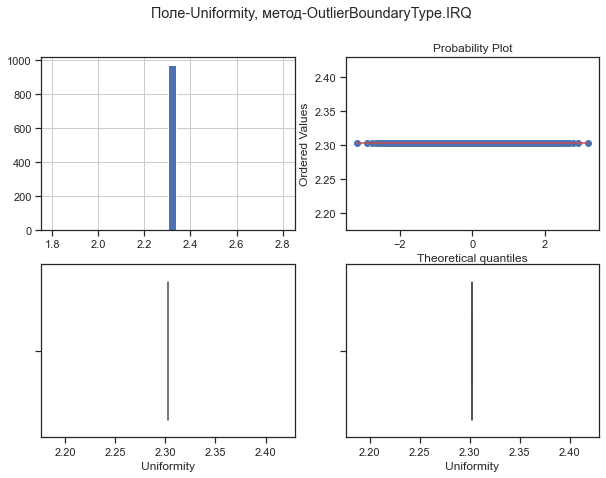

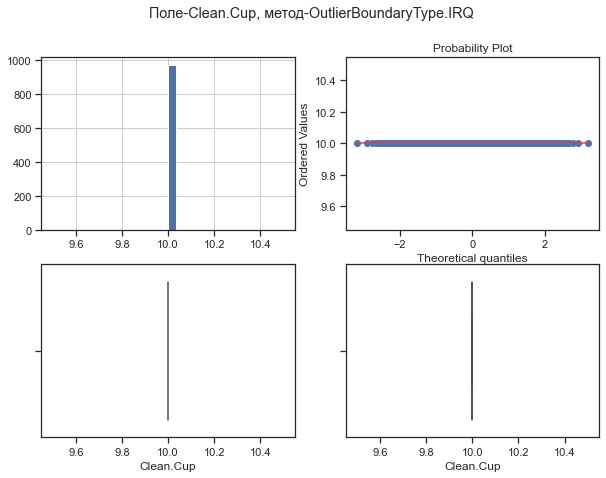

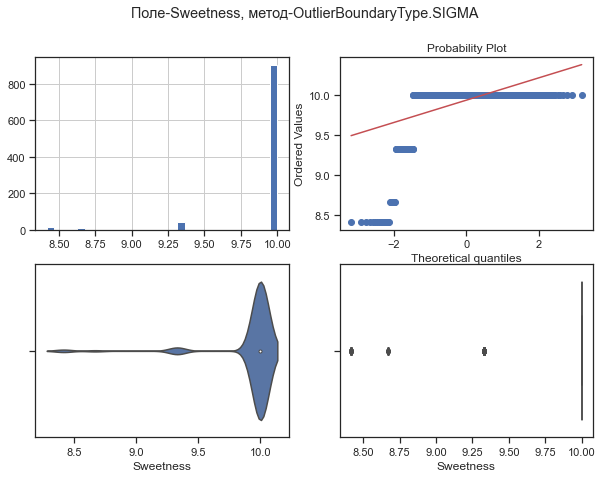

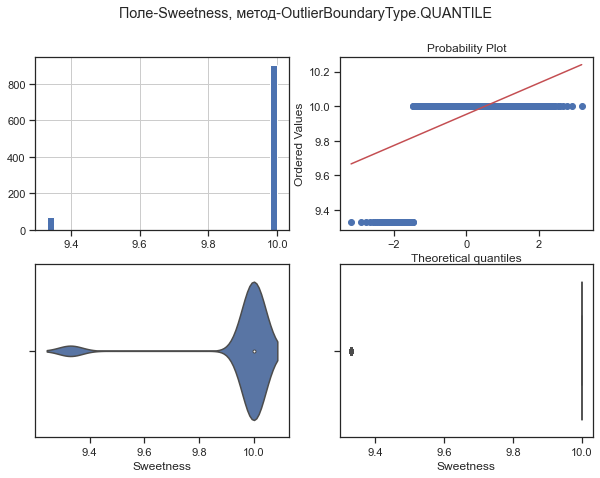

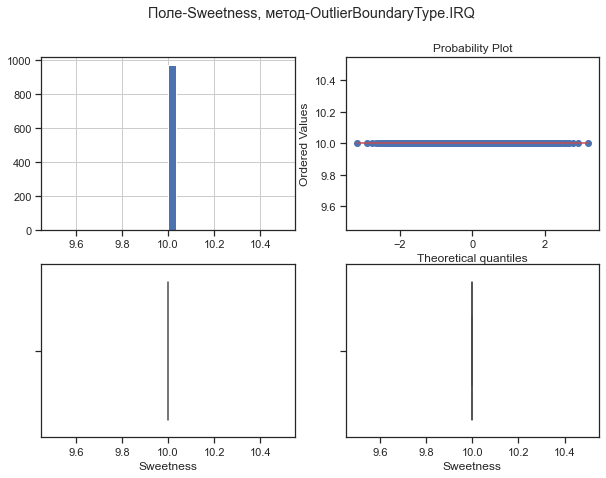

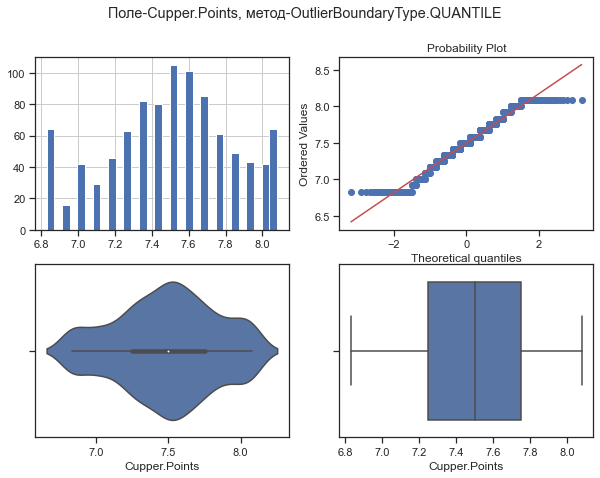

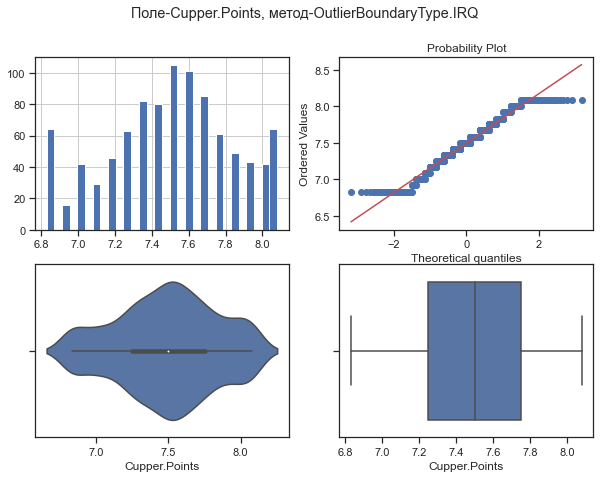

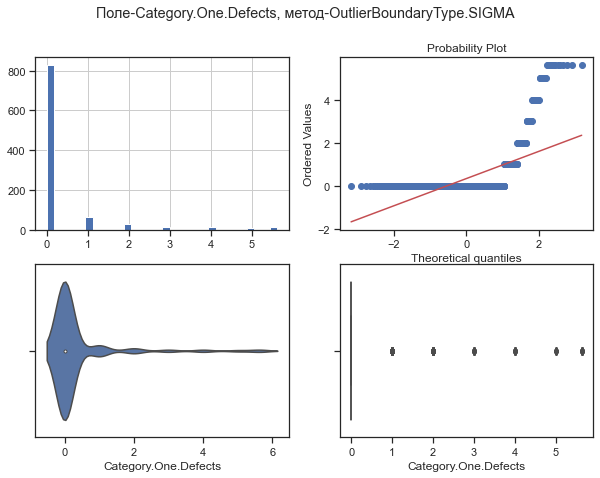

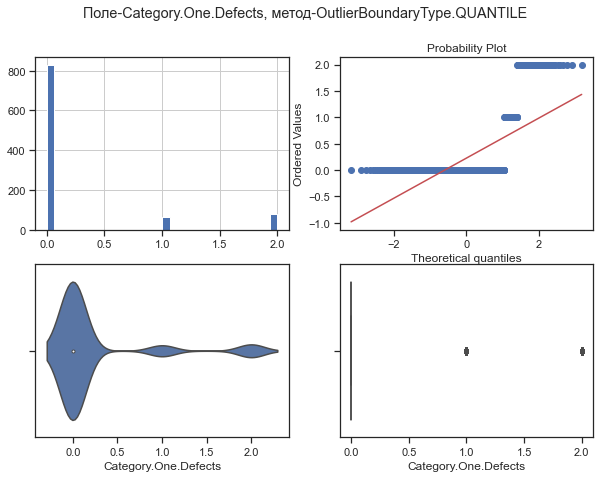

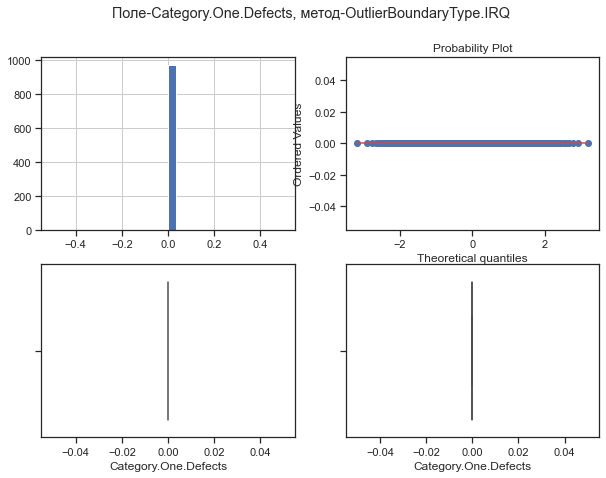

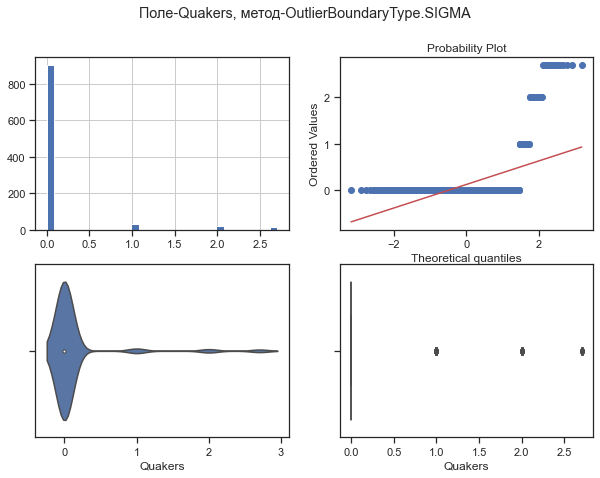

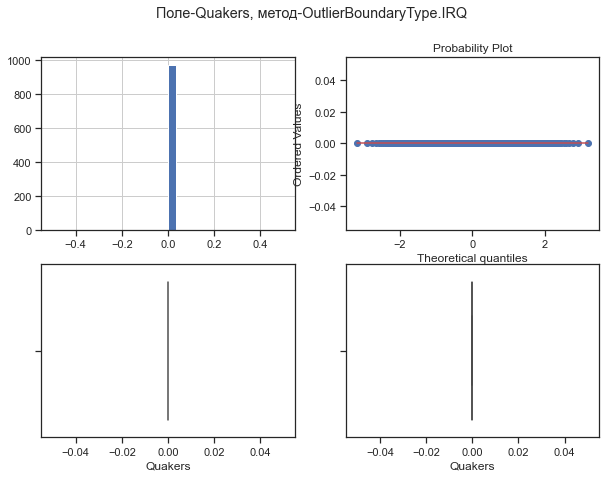

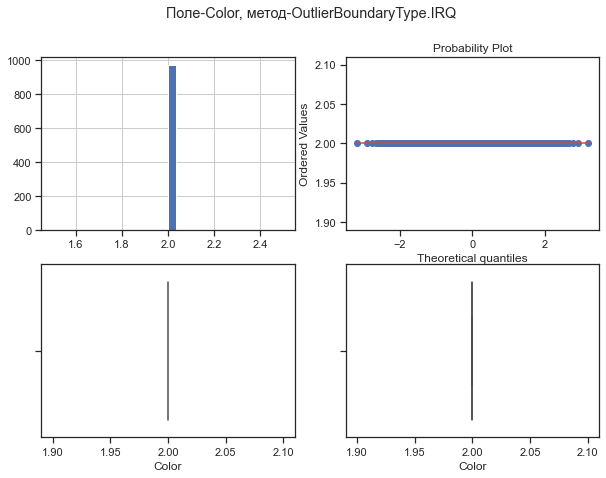

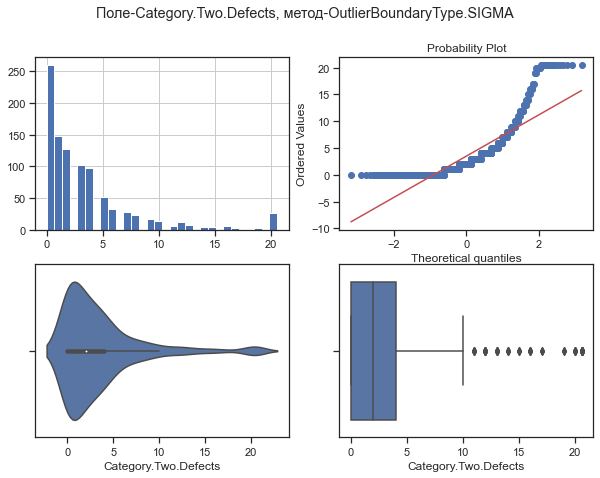

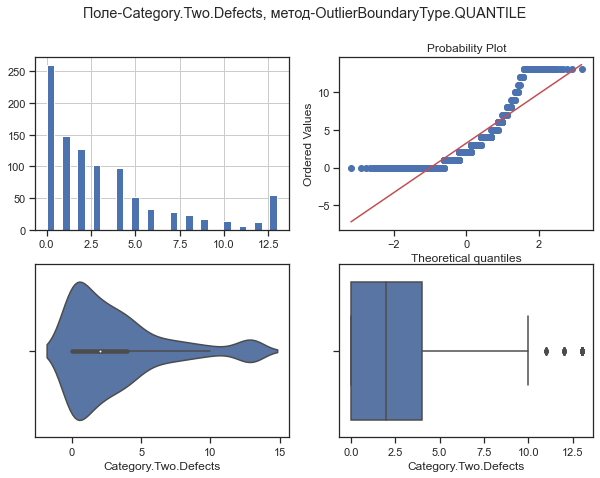

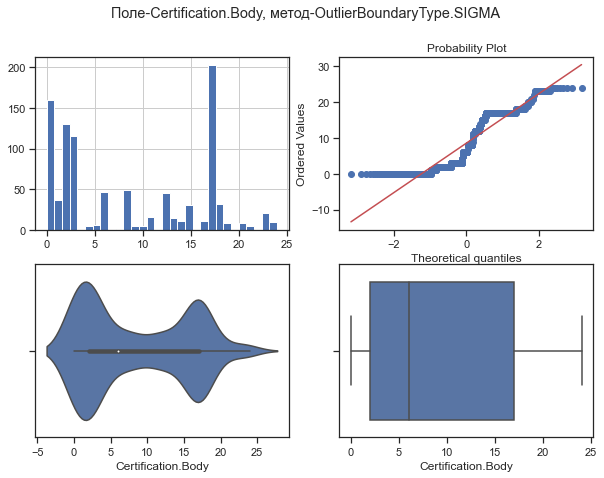

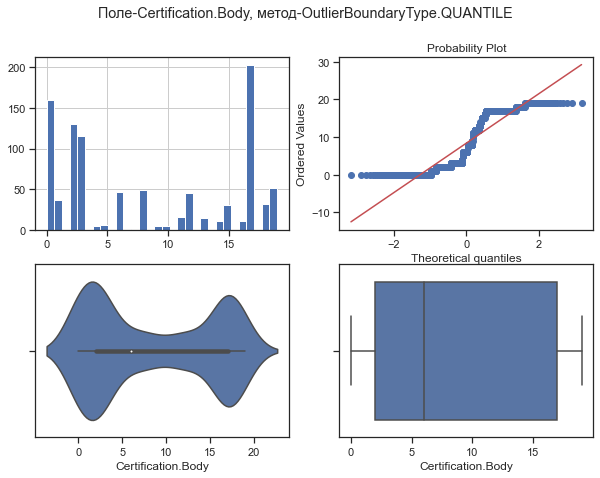

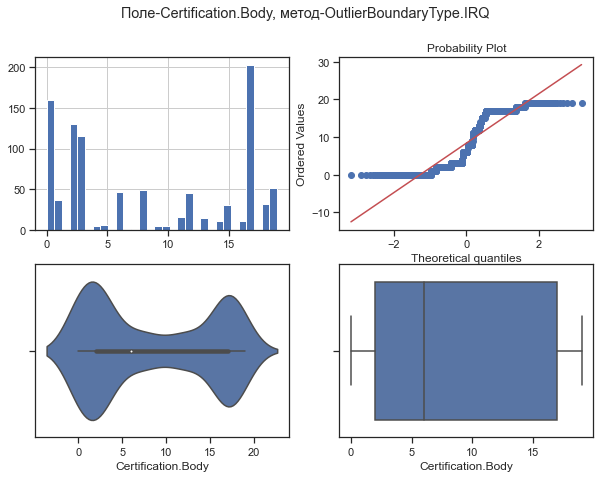

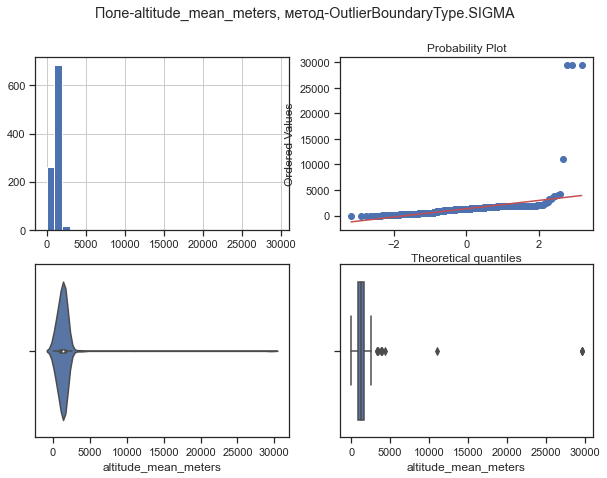

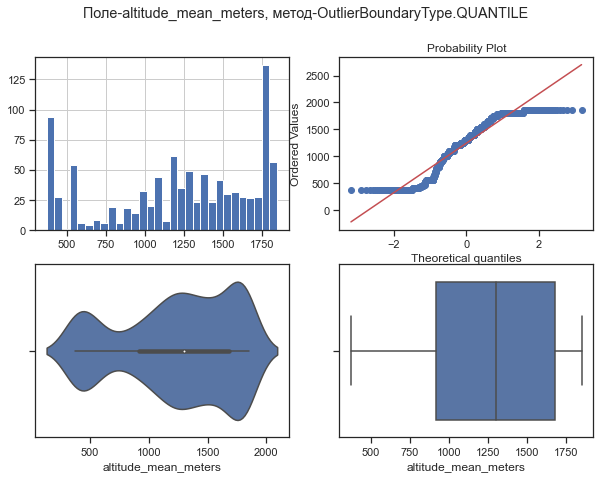

In [346]:
for col in numeric_columns_3:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(X_train, col, obt)
        # Изменение данных
        X_train[col] = np.where(X_train[col] > upper_boundary, upper_boundary, 
                                 np.where(X_train[col] < lower_boundary, lower_boundary, X_train[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(X_train, col, title)

## Отбор признаков

**Метод из группы методов фильтрации**

In [347]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

make_corr_df(df)

f1                    f2      corr
0    altitude_low_meters  altitude_mean_meters  0.999943
1   altitude_mean_meters   altitude_low_meters  0.999943
2   altitude_mean_meters  altitude_high_meters  0.999943
3   altitude_high_meters  altitude_mean_meters  0.999943
4    altitude_low_meters  altitude_high_meters  0.999772
5   altitude_high_meters   altitude_low_meters  0.999772
6                 Flavor            Aftertaste  0.895253
7             Aftertaste                Flavor  0.895253
8                 Flavor      Total.Cup.Points  0.877988
9       Total.Cup.Points                Flavor  0.877988
10      Total.Cup.Points            Aftertaste  0.866111
11            Aftertaste      Total.Cup.Points  0.866111
12      Total.Cup.Points               Balance  0.836450
13               Balance      Total.Cup.Points  0.836450
14               Balance            Aftertaste  0.823344
15            Aftertaste               Balance  0.823344
16               Acidity                Flavor  0.816705
17                Flavor               Acidity  0.816705
18                 Aroma                Flavor  0.814304
19                Flavor                 Aroma  0.814304
20                Flavor               Balance  0.802548
21               Balance                Flavor  0.802548
22      Total.Cup.Points         Cupper.Points  0.802050
23         Cupper.Points      Total.Cup.Points  0.802050
24      Total.Cup.Points               Acidity  0.801064
25               Acidity      Total.Cup.Points  0.801064

In [348]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

corr_groups(make_corr_df(df))

[['altitude_mean_meters', 'altitude_high_meters', 'altitude_low_meters'],
 ['Aftertaste', 'Total.Cup.Points', 'Acidity', 'Aroma', 'Balance', 'Flavor'],
 ['Total.Cup.Points', 'Cupper.Points']]

**Метод из группы методов обертывания**

In [350]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import Lasso, LinearRegression

knn = KNeighborsClassifier(n_neighbors=3)


sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X_train, y_train)
sfs.k_feature_names_



('Aroma', 'Flavor', 'Aftertaste', 'Balance', 'Cupper.Points')

**Метод из группы методов вложений**

In [353]:
from sklearn.feature_selection import SelectFromModel

# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X_train, y_train)
# Коэффициенты регрессии
list(zip(data.drop('Total.Cup.Points', axis=1).columns, e_ls1.coef_))

sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X_train, y_train)
list(zip(data.drop('Total.Cup.Points', axis=1).columns, sel_e_ls1.get_support()))

[('Species', False),
 ('Owner', False),
 ('Country.of.Origin', True),
 ('Farm.Name', True),
 ('Lot.Number', True),
 ('Mill', True),
 ('ICO.Number', True),
 ('Company', True),
 ('Altitude', True),
 ('Region', False),
 ('Producer', False),
 ('Number.of.Bags', False),
 ('Bag.Weight', False),
 ('In.Country.Partner', False),
 ('Harvest.Year', False),
 ('Grading.Date', False),
 ('Owner.1', False),
 ('Variety', False),
 ('Processing.Method', False),
 ('Aroma', False),
 ('Flavor', False),
 ('Aftertaste', False),
 ('Acidity', False),
 ('Body', False),
 ('Balance', False),
 ('Uniformity', True),
 ('Clean.Cup', False),
 ('Sweetness', True)]

# Домашнее задание

## Auto ML

In [357]:
!pip install mljar-supervised
!pip install delayed

     |████████████████████████████████| 109 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 16.0 MB 762 kB/s eta 0:00:01
     |████████████████████████████████| 10.5 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 30.8 MB 64 kB/s eta 0:00:0112
     |████████████████████████████████| 7.2 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 173 kB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 319 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 220 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 293 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 13.2

     |████████████████████████████████| 18.5 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 1.9 MB/s eta 0:00:01
  Created wheel for mljar-supervised: filename=mljar_supervised-0.10.4-py3-none-any.whl size=143930 sha256=e51beaf3cd6e6076ca0ae9e55deeffd79103bd10475e8df22d2a349438fbc292
  Stored in directory: /Users/vitaly/Library/Caches/pip/wheels/7c/59/78/d9968c8dc20ba10b973d4ec0ac34b672b7f2788c5bb6f89083
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66636 sha256=558c1c31d4c1ee9002b7be6b9a1128351d956f3aae9369500956f944384fcd2a
  Stored in directory: /Users/vitaly/Library/Caches/pip/wheels/9e/37/2c/3b30269ca762b6bb992fd0abb640f3e384c290e719597fddbc
  Created wheel for shap: filename=shap-0.36.0-cp38-cp38-macosx_10_15_x86_64.whl size=371403 sha256=55cfe0d6f1aae08046da8303b7a53be4d16885c960f24454312d7a10ad7d8904
  Stored in directory: /Users/vitaly/Library/Caches/pip/wheels/95/cb/07/4fad1b66b2085b03eab34848c37d47d0782c53e3e57d277e8d
  Crea

In [364]:
from supervised.automl import AutoML

In [366]:
train = df
train.head()
auto_ml_cols = ['altitude_mean_meters', 'Region', 'Processing.Method', 'Variety', 'Color', 'Certification.Body']

automl = AutoML()
automl.fit(train[auto_ml_cols], train['Total.Cup.Points'])

AutoML directory: AutoML_2
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 2.645502 trained in 0.67 seconds
2_DecisionTree rmse 2.480029 trained in 7.73 seconds
3_Linear rmse 2.597196 trained in 5.57 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost rmse 2.450514 trained in 3.59 seconds
5_Default_NeuralNetwork rmse 2.562968 trained in 1.11 seconds
6_Default_RandomForest rmse 2.424812 trained in 2.74 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 2.405223 trained in 0.29 seconds
AutoML fit time: 32.25 seconds
AutoML best model: Ensemble


AutoML()